# Compiled Steps

## Insight Decentralized Consensus Fellow
#### Shyla Hardwick, 2019

### Similarities Amid Smart Contracts

Everyday new smart contracts are published to Ethereum’s blockchain. Some contracts perform simple exchanges while others initiate complex iterative processes between parties. Smart contracts are also subject to multiple forms of attack. This project, ‘Compiled Steps’ is a tool to quantify the smart contract landscape through edit distance analysis which, I think, is a step towards understanding vulnerabilities, use case variability, and uniqueness.


In [1]:
import Levenshtein as lv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk
import time 

In [3]:
data = pd.read_csv('Levdist_contracts_avail.csv' , quoting = 2)
data


,Contract Name,distance =0,0 < distance< 100,100 < distance < 1000
0,Ballot,7.0,1.0,3.0
1,Blind Auction,0.0,0.0,0.0
2,Safe Remote Purchase,0.0,0.0,5137.0
3,Simple Auction,1.0,0.0,6761.0
4,Coin,94.0,1.0,8815.0
5,Crowdsale,4.0,0.0,29.0
6,Greeter,127.0,47.0,9183.0
7,Mortal,7.0,48.0,8669.0
8,Token,0.0,2728.0,5965.0


In [4]:
cccdata = pd.read_csv('bytecode_ccc.csv')



#print(cccdata)

#listcccdata = list(cccdata)
print(cccdata.values)
#print(listcccdata)

[['60806040523480156200001157600080fd5b50604051604080620015c0833981018060405260408110156200003357600080fd5b8101908080519060200190929190805190602001909291905050506040518060400160405280600881526020017f506920746f6b656e000000000000000000000000000000000000000000000000815250600490805190602001906200009b929190620001f7565b506040518060400160405280600381526020017f504954000000000000000000000000000000000000000000000000000000000081525060059080519060200190620000e9929190620001f7565b506005600660006101000a81548160ff021916908360ff160217905550678ac7230489e80000600081905550600054600160008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555080600860006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555081600960006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550612710600781905550610168600a8190555050506

In [5]:
a = '608060405234801561001057600080fd5b5061064c806100206000396000f3fe608060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680633053d42514610067578063d1d6b739146100a2578063d50f6bf0146100f3578063f1d9a15014610137575b600080fd5b34801561007357600080fd5b506100a06004803603602081101561008a57600080fd5b810190808035906020019092919050505061018e565b005b3480156100ae57600080fd5b506100f1600480360360208110156100c557600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506102c1565b005b6101356004803603602081101561010957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610521565b005b34801561014357600080fd5b5061014c610604565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b610196610604565b73ffffffffffffffffffffffffffffffffffffffff1663baa8529c82600102336040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808381526020018273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200192505050600060405180830381600087803b15801561023b57600080fd5b505af115801561024f573d6000803e3d6000fd5b505050507f81edd4db25e5f4dd9ff05adc61a5f7367c7580d8377fc1515f123dc2f8f0660e8133604051808381526020018273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019250505060405180910390a150565b600081905060008173ffffffffffffffffffffffffffffffffffffffff166370a08231306040518263ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060206040518083038186803b15801561036157600080fd5b505afa158015610375573d6000803e3d6000fd5b505050506040513d602081101561038b57600080fd5b810190808051906020019092919050505090508173ffffffffffffffffffffffffffffffffffffffff1663a9059cbb33836040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b15801561044157600080fd5b505af1158015610455573d6000803e3d6000fd5b505050506040513d602081101561046b57600080fd5b8101908080519060200190929190505050507fd8f79f5d849793fdf5be89c8a0af0a3098da237cff4e584f0a1425d965f0a54b833383604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828152602001935050505060405180910390a1505050565b8073ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f1935050505015801561057e573d6000803e3d6000fd5b507fe50f164895b3088b33908095af6c4942d11b68e181077937b8c0483e087a7b79813073ffffffffffffffffffffffffffffffffffffffff1631604051808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019250505060405180910390a150565b600073448a5065aebb8e423f0896e6c5d525c040f59af390509056fea165627a7a72305820da2aeee8fbd92b17ab5f1ba4c0b451d56ba5b77f9afd0338f0da86e979f6a1650029'
b = '608060405234801561001057600080fd5b50610611806100206000396000f3fe608060405260043610610062576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680633053d42514610067578063d1d6b739146100a2578063e28d717b146100f3578063f1d9a150146100fd575b600080fd5b34801561007357600080fd5b506100a06004803603602081101561008a57600080fd5b8101908080359060200190929190505050610154565b005b3480156100ae57600080fd5b506100f1600480360360208110156100c557600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610287565b005b6100fb6104e7565b005b34801561010957600080fd5b506101126105c9565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b61015c6105c9565b73ffffffffffffffffffffffffffffffffffffffff1663baa8529c82600102336040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808381526020018273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200192505050600060405180830381600087803b15801561020157600080fd5b505af1158015610215573d6000803e3d6000fd5b505050507f81edd4db25e5f4dd9ff05adc61a5f7367c7580d8377fc1515f123dc2f8f0660e8133604051808381526020018273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019250505060405180910390a150565b600081905060008173ffffffffffffffffffffffffffffffffffffffff166370a08231306040518263ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060206040518083038186803b15801561032757600080fd5b505afa15801561033b573d6000803e3d6000fd5b505050506040513d602081101561035157600080fd5b810190808051906020019092919050505090508173ffffffffffffffffffffffffffffffffffffffff1663a9059cbb33836040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b15801561040757600080fd5b505af115801561041b573d6000803e3d6000fd5b505050506040513d602081101561043157600080fd5b8101908080519060200190929190505050507fd8f79f5d849793fdf5be89c8a0af0a3098da237cff4e584f0a1425d965f0a54b833383604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828152602001935050505060405180910390a1505050565b3373ffffffffffffffffffffffffffffffffffffffff166108fc3073ffffffffffffffffffffffffffffffffffffffff16319081150290604051600060405180830381858888f19350505050158015610544573d6000803e3d6000fd5b507fe50f164895b3088b33908095af6c4942d11b68e181077937b8c0483e087a7b79333073ffffffffffffffffffffffffffffffffffffffff1631604051808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019250505060405180910390a1565b600073448a5065aebb8e423f0896e6c5d525c040f59af390509056fea165627a7a72305820f94754dc5b7f0dbe6ee7e605b5b4d64d3c15207d019dce3841d6416ed9dc77d70029'
c = '60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a723058200d047f9865bddc0b0b1d594204392ca659130930cf8c384908f3b289ba905f0300290000000000000000000000000000000000000000000000000000000053724e00000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a00000000000000000000000000000000000000000000000000000000000000003505954000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000035059540000000000000000000000000000000000000000000000000000000000'
d = '60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a7230582060186539b66019d0c7d7ddc8558795ba2a01951b29dec4b36596282dd0a472b70029000000000000000000000000000000000000000000000000000000003b9aca00000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000e506f776572596f756e67436f696e00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000035059430000000000000000000000000000000000000000000000000000000000'
e = '60806040526040518060400160405280600281526020017f43420000000000000000000000000000000000000000000000000000000000008152506004908051906020019062000051929190620005cd565b506040518060400160405280600281526020017f4342000000000000000000000000000000000000000000000000000000000000815250600590805190602001906200009f929190620005cd565b506012600655348015620000b257600080fd5b5060405160a0806200224f8339810180604052620000d49190810190620006be565b84600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555083600760006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff1614156200019157600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff161415620001cc57600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614156200020757600080fd5b81600f8190555060006b19d971e4fe8401e740000000905083600d60006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506b052b7d2dcc80cd2e40000000600e8190555062000291306b052b7d2dcc80cd2e40000000620003c360201b60201c565b620002af826b0295be96e640669720000000620003c360201b60201c565b620002e46064620002d06005846200052660201b620014a51790919060201c565b6200056460201b6200141f1790919060201c565b6009819055506200032b6b0295be96e64066972000000062000317600e54846200058c60201b620014851790919060201c565b6200058c60201b620014851790919060201c565b600a819055506200034530600a54620003c360201b60201c565b60076010819055506002601181905550600062000375600954600a546200058c60201b620014851790919060201c565b1115620003a6576200039a600954600a546200058c60201b620014851790919060201c565b600c81905550620003af565b6000600c819055505b6000600b81905550505050505050620007ca565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff161415620003fe57600080fd5b6200041a81600254620005ad60201b620014661790919060201c565b60028190555062000478816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054620005ad60201b620014661790919060201c565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040516200051a919062000751565b60405180910390a35050565b6000808314156200053b57600090506200055e565b60008284029050828482816200054d57fe5b04146200055957600080fd5b809150505b92915050565b60008082116200057357600080fd5b60008284816200057f57fe5b0490508091505092915050565b6000828211156200059c57600080fd5b600082840390508091505092915050565b600080828401905083811015620005c357600080fd5b8091505092915050565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200061057805160ff191683800117855562000641565b8280016001018555821562000641579182015b828111156200064057825182559160200191906001019062000623565b5b50905062000650919062000654565b5090565b6200067991905b80821115620006755760008160009055506001016200065b565b5090565b90565b60006200068a825162000778565b905092915050565b6000620006a082516200078c565b905092915050565b6000620006b68251620007c0565b905092915050565b600080600080600060a08688031215620006d757600080fd5b6000620006e78882890162000692565b9550506020620006fa888289016200067c565b94505060406200070d888289016200067c565b93505060606200072088828901620006a8565b925050608062000733888289016200067c565b9150509295509295909350565b6200074b816200076e565b82525050565b600060208201905062000768600083018462000740565b92915050565b6000819050919050565b60006200078582620007a0565b9050919050565b6000620007998262000778565b9050919050565b600073ffffffffffffffffffffffffffffffffffffffff82169050919050565b6000819050919050565b611a7580620007da6000396000f3fe608060405234801561001057600080fd5b506004361061014d5760003560e01c806361f3c62e116100c3578063a457c2d71161007c578063a457c2d7146103a4578063a9059cbb146103d4578063c54dcc5714610404578063d5a9c38214610422578063dd62ed3e14610440578063e25fe175146104705761014d565b806361f3c62e146102ce5780636ab33368146102ec57806370a082311461031c578063816e8ec81461034c57806395d89b41146103685780639cbc923e146103865761014d565b806323b872dd1161011557806323b872dd1461020c578063313ce5671461023c57806338cf64001461025a57806339509351146102645780635c062d6c146102945780635ee240b1146102b25761014d565b806306fdde0314610152578063095ea7b3146101705780630ca9966a146101a057806318160ddd146101be57806318d1027a146101dc575b600080fd5b61015a61048e565b604051610167919061187b565b60405180910390f35b61018a60048036036101859190810190611785565b61052c565b6040516101979190611860565b60405180910390f35b6101a8610543565b6040516101b591906118b8565b60405180910390f35b6101c6610549565b6040516101d391906118b8565b60405180910390f35b6101f660048036036101f19190810190611785565b610553565b60405161020391906118b8565b60405180910390f35b61022660048036036102219190810190611736565b610a0c565b6040516102339190611860565b60405180910390f35b610244610abd565b60405161025191906118b8565b60405180910390f35b610262610ac3565b005b61027e60048036036102799190810190611785565b610c66565b60405161028b9190611860565b60405180910390f35b61029c610d0b565b6040516102a991906118b8565b60405180910390f35b6102cc60048036036102c791908101906116d1565b610d11565b005b6102d6610ea5565b6040516102e391906118b8565b60405180910390f35b610306600480360361030191908101906116d1565b610eab565b6040516103139190611860565b60405180910390f35b610336600480360361033191908101906116d1565b610ecb565b60405161034391906118b8565b60405180910390f35b610366600480360361036191908101906116d1565b610f13565b005b6103706110a7565b60405161037d919061187b565b60405180910390f35b61038e611145565b60405161039b9190611845565b60405180910390f35b6103be60048036036103b99190810190611785565b61116b565b6040516103cb9190611860565b60405180910390f35b6103ee60048036036103e99190810190611785565b611210565b6040516103fb9190611860565b60405180910390f35b61040c611227565b60405161041991906118b8565b60405180910390f35b61042a61122d565b60405161043791906118b8565b60405180910390f35b61045a600480360361045591908101906116fa565b611233565b60405161046791906118b8565b60405180910390f35b6104786112ba565b60405161048591906118b8565b60405180910390f35b60048054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105245780601f106104f957610100808354040283529160200191610524565b820191906000526020600020905b81548152906001019060200180831161050757829003601f168201915b505050505081565b60006105393384846112c0565b6001905092915050565b600f5481565b6000600254905090565b6000600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ac29c73960011515600860003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff161515146105f3576101f96105f6565b60005b6040518263ffffffff1660e01b8152600401610612919061189d565b60006040518083038186803b15801561062a57600080fd5b505afa15801561063e573d6000803e3d6000fd5b505050506000600a5414156106565760009050610a06565b600082905060008090505b6000821115610802576000600b5460020a90506000610689828561141f90919063ffffffff16565b905060006106a0838661144590919063ffffffff16565b146106bc576106b960018261146690919063ffffffff16565b90505b6106d3600c54600a5461148590919063ffffffff16565b8111156107405760006106f3600c54600a5461148590919063ffffffff16565b9050610708818561146690919063ffffffff16565b935061072f61072084836114a590919063ffffffff16565b8661148590919063ffffffff16565b9450600c54600a8190555050610775565b610753818461146690919063ffffffff16565b92506000935061076e81600a5461148590919063ffffffff16565b600a819055505b600c54600a54116107fb576000600c54146107f5576107a06001600b5461146690919063ffffffff16565b600b8190555060006107bf600954600a5461148590919063ffffffff16565b11156107e7576107dc600954600a5461148590919063ffffffff16565b600c819055506107f0565b6000600c819055505b6107fa565b600093505b5b5050610661565b61080d3086836114df565b8473ffffffffffffffffffffffffffffffffffffffff167f02a6a2be713fedf52f113c0a759f1c1a23a113476d9b1b1a2a453c910660de4e82866040516108559291906118fc565b60405180910390a2600061088860105461087a601154856114a590919063ffffffff16565b61141f90919063ffffffff16565b905080600e5410610952576108a881600e5461148590919063ffffffff16565b600e819055506108db30600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16836114df565b600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f90bee5338e44b87ea85a0c19e7140f0f7546b2f54c2c51a6f19f4a2c3e7005fc82846040516109459291906118fc565b60405180910390a26109ff565b600e5490506000600e8190555061098c30600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16836114df565b600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f90bee5338e44b87ea85a0c19e7140f0f7546b2f54c2c51a6f19f4a2c3e7005fc82846040516109f69291906118fc565b60405180910390a25b8193505050505b92915050565b6000610a198484846114df565b610ab28433610aad85600160008a73ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461148590919063ffffffff16565b6112c0565b600190509392505050565b60065481565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ac29c739600760009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614610b5e576101f7610b61565b60005b6040518263ffffffff1660e01b8152600401610b7d919061189d565b60006040518083038186803b158015610b9557600080fd5b505afa158015610ba9573d6000803e3d6000fd5b50505050600f54431115610c6457610be630600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16600e546114df565b6000600e81905550600d60009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f90bee5338e44b87ea85a0c19e7140f0f7546b2f54c2c51a6f19f4a2c3e7005fc600e546000604051610c5b9291906118d3565b60405180910390a25b565b6000610d013384610cfc85600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008973ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461146690919063ffffffff16565b6112c0565b6001905092915050565b600b5481565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ac29c739600760009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614610dac576101f7610daf565b60005b6040518263ffffffff1660e01b8152600401610dcb919061189d565b60006040518083038186803b158015610de357600080fd5b505afa158015610df7573d6000803e3d6000fd5b505050506000600860008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055508073ffffffffffffffffffffffffffffffffffffffff167f4ee22d425dc5b01b0d9fb2b7bb4b9983655ab1cf11e46e96c7bcef856bb5c9c06000604051610e9a9190611860565b60405180910390a250565b600a5481565b60086020528060005260406000206000915054906101000a900460ff1681565b60008060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663ac29c739600760009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614610fae576101f7610fb1565b60005b6040518263ffffffff1660e01b8152600401610fcd919061189d565b60006040518083038186803b158015610fe557600080fd5b505afa158015610ff9573d6000803e3d6000fd5b505050506001600860008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055508073ffffffffffffffffffffffffffffffffffffffff167f4ee22d425dc5b01b0d9fb2b7bb4b9983655ab1cf11e46e96c7bcef856bb5c9c0600160405161109c9190611860565b60405180910390a250565b60058054600181600116156101000203166002900480601f01602080910402602001604051908101604052809291908181526020018280546001816001161561010002031660029004801561113d5780601f106111125761010080835404028352916020019161113d565b820191906000526020600020905b81548152906001019060200180831161112057829003601f168201915b505050505081565b600760009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000611206338461120185600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008973ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461148590919063ffffffff16565b6112c0565b6001905092915050565b600061121d3384846114df565b6001905092915050565b600c5481565b600e5481565b6000600160008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b60095481565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614156112fa57600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff16141561133457600080fd5b80600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b9258360405161141291906118b8565b60405180910390a3505050565b600080821161142d57600080fd5b600082848161143857fe5b0490508091505092915050565b60008082141561145457600080fd5b81838161145d57fe5b06905092915050565b60008082840190508381101561147b57600080fd5b8091505092915050565b60008282111561149457600080fd5b600082840390508091505092915050565b6000808314156114b857600090506114d9565b60008284029050828482816114c957fe5b04146114d457600080fd5b809150505b92915050565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff16141561151957600080fd5b61156a816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461148590919063ffffffff16565b6000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506115fd816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461146690919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef8360405161169c91906118b8565b60405180910390a3505050565b60006116b58235611997565b905092915050565b60006116c982356119c9565b905092915050565b6000602082840312156116e357600080fd5b60006116f1848285016116a9565b91505092915050565b6000806040838503121561170d57600080fd5b600061171b858286016116a9565b925050602061172c858286016116a9565b9150509250929050565b60008060006060848603121561174b57600080fd5b6000611759868287016116a9565b935050602061176a868287016116a9565b925050604061177b868287016116bd565b9150509250925092565b6000806040838503121561179857600080fd5b60006117a6858286016116a9565b92505060206117b7858286016116bd565b9150509250929050565b6117ca81611941565b82525050565b6117d981611953565b82525050565b6117e8816119d3565b82525050565b60006117f982611925565b6118038185611930565b93506118138185602086016119f7565b61181c81611a2a565b840191505092915050565b611830816119e5565b82525050565b61183f8161198d565b82525050565b600060208201905061185a60008301846117c1565b92915050565b600060208201905061187560008301846117d0565b92915050565b6000602082019050818103600083015261189581846117ee565b905092915050565b60006020820190506118b26000830184611827565b92915050565b60006020820190506118cd6000830184611836565b92915050565b60006040820190506118e86000830185611836565b6118f560208301846117df565b9392505050565b60006040820190506119116000830185611836565b61191e6020830184611836565b9392505050565b600081519050919050565b600082825260208201905092915050565b600061194c8261196d565b9050919050565b60008115159050919050565b600061ffff82169050919050565b600073ffffffffffffffffffffffffffffffffffffffff82169050919050565b6000819050919050565b60006119a2826119a9565b9050919050565b600073ffffffffffffffffffffffffffffffffffffffff82169050919050565b6000819050919050565b60006119de8261198d565b9050919050565b60006119f08261195f565b9050919050565b60005b83811015611a155780820151818401526020810190506119fa565b83811115611a24576000848401525b50505050565b6000601f19601f830116905091905056fea265627a7a723058204e0328fb0de087b6cf7c58fad0e6a3d28f236e3391f53b5ccdba4ebda3a236876c6578706572696d656e74616cf50037000000000000000000000000e116d2186f093e1bb3fb83864260d3b8ee26e7c400000000000000000000000078caac9bfa4f3a2866898016bf1fc4a2fb77ff42000000000000000000000000d090ea30bb4b9cd4df7c658ad74442dcf14078730000000000000000000000000000000000000000000000000000000000b478210000000000000000000000002a0a9592120c9c7b95f9b7531db36804890acf66'
f = '60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a72305820de8f4bed54151173a791c519e5bac2ee3f7212eebf8c8f4344b8a0504637c0a800290000000000000000000000000000000000000000000000000000000005f5e100000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000442694c69000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002424c000000000000000000000000000000000000000000000000000000000000'
g = '60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a72305820de8f4bed54151173a791c519e5bac2ee3f7212eebf8c8f4344b8a0504637c0a800290000000000000000000000000000000000000000000000000000000005f5e100000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000442694c69000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002424c000000000000000000000000000000000000000000000000000000000000'
h = '60806040526001600255662386f26fc1000060035560025460035460405162000028906200030c565b9182526020820152604080519182900301906000f08015801562000050573d6000803e3d6000fd5b50600480546001600160a01b0319166001600160a01b039290921691909117905560025460035460405162000085906200030c565b9182526020820152604080519182900301906000f080158015620000ad573d6000803e3d6000fd5b50600580546001600160a01b0319166001600160a01b0392909216919091179055600254600354604051620000e2906200030c565b9182526020820152604080519182900301906000f0801580156200010a573d6000803e3d6000fd5b50600680546001600160a01b0319166001600160a01b0392909216919091179055600060088190556064600955600a81905560408051918252602082019081905290516200015b91600c916200031a565b503480156200016957600080fd5b50600080546001600160a01b03191633178082556040516001600160a01b039190911691907f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0908290a360048054601060209081527f6e0956cda88cad152e89927e53611735b61a5c762d1428573c6931b0a5efcb0180546001600160a01b039384166001600160a01b0319918216179091556005547f8c6065603763fec3f5742441d3833f3f43b982453612d76adb39a885e3006b5f805491851691831691909117905560065460026000527f853b2fefe141400fef543280f93d98bd49996069f632d0d20236afeeed8e46a2805491909416911617909155604080517f771602f700000000000000000000000000000000000000000000000000000000815242938101939093526201518060248401525173231773551c008d9df068e8742691c52d1d86b2fe9263771602f7926044808301939192829003018186803b158015620002d557600080fd5b505af4158015620002ea573d6000803e3d6000fd5b505050506040513d60208110156200030157600080fd5b5051600755620003eb565b61057e80620029d483390190565b82805482825590600052602060002090601f01602090048101928215620003b55791602002820160005b838211156200038457835183826101000a81548160ff021916908360ff160217905550926020019260010160208160000104928301926001030262000344565b8015620003b35782816101000a81549060ff021916905560010160208160000104928301926001030262000384565b505b50620003c3929150620003c7565b5090565b620003e891905b80821115620003c357805460ff19168155600101620003ce565b90565b6125d980620003fb6000396000f3fe60806040526004361061011f5760003560e01c80637ad71f72116100a0578063b82b245e11610064578063b82b245e14610352578063d11711a214610367578063f2fde38b1461037c578063fb90f9e9146103af578063fe188184146103c45761011f565b80637ad71f72146102d45780638da5cb5b146102fe5780638f32d59b14610313578063955a015b14610328578063b69fcd5d1461033d5761011f565b80635958611e116100e75780635958611e1461020857806363b4b1121461021d5780636d427fa3146102645780637024dc2e1461028e578063715018a6146102bf5761011f565b806323e3fbd51461012b5780632e276499146101705780633ccfd60b146101855780634d9b37351461019a57806356084664146101a2575b61012933346103d9565b005b34801561013757600080fd5b5061015e6004803603602081101561014e57600080fd5b50356001600160a01b03166104ef565b60408051918252519081900360200190f35b34801561017c57600080fd5b5061015e61050a565b34801561019157600080fd5b50610129610510565b61012961058b565b3480156101ae57600080fd5b506101cc600480360360208110156101c557600080fd5b50356105ce565b604080516001600160a01b0396871681526020810195909552928516848401529084166060840152909216608082015290519081900360a00190f35b34801561021457600080fd5b5061015e61060c565b34801561022957600080fd5b506102506004803603602081101561024057600080fd5b50356001600160a01b0316610612565b604080519115158252519081900360200190f35b34801561027057600080fd5b506101296004803603602081101561028757600080fd5b5035610648565b34801561029a57600080fd5b506102a361065e565b604080516001600160a01b039092168252519081900360200190f35b3480156102cb57600080fd5b5061012961066d565b3480156102e057600080fd5b506102a3600480360360208110156102f757600080fd5b50356106c8565b34801561030a57600080fd5b506102a36106e3565b34801561031f57600080fd5b506102506106f3565b34801561033457600080fd5b5061015e610704565b34801561034957600080fd5b506102a361070a565b34801561035e57600080fd5b506102a3610719565b34801561037357600080fd5b50610129610728565b34801561038857600080fd5b506101296004803603602081101561039f57600080fd5b50356001600160a01b0316610a54565b3480156103bb57600080fd5b506102a3610a71565b3480156103d057600080fd5b506102a3610a80565b6004546001600160a01b0383811691161480159061040557506005546001600160a01b03838116911614155b801561041f57506006546001600160a01b03838116911614155b156104eb578061049b576000610434836104ef565b1461044657610441610510565b610496565b60408051600160e51b62461bcd02815260206004820152601560248201527f596f752068617665207a65726f2062616c616e63650000000000000000000000604482015290519081900360640190fd5b6104eb565b60408051600160e51b62461bcd02815260206004820181905260248201527f596f752063616e277420646f206e6f6e7a65726f207472616e73616374696f6e604482015290519081900360640190fd5b5050565b6001600160a01b031660009081526011602052604090205490565b60035481565b33600081815260116020526040808220805490839055905190929183156108fc02918491818181858888f19350505050158015610551573d6000803e3d6000fd5b5060408051828152905133917f7084f5476618d8e60b11ef0d7d3f06914655adb8793e28ff7f018d4c76d505d5919081900360200190a250565b6004546001600160a01b03163314806105ae57506005546001600160a01b031633145b806105c357506006546001600160a01b031633145b6105cc57600080fd5b565b601260205260009081526040902080546001820154600283015460038401546004909401546001600160a01b03938416949293918216928216911685565b60075481565b600061061c6106f3565b61062557600080fd5b50600180546001600160a01b0383166001600160a01b0319909116178155919050565b6106506106f3565b61065957600080fd5b600355565b6006546001600160a01b031681565b6106756106f3565b61067e57600080fd5b600080546040516001600160a01b03909116907f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e0908390a3600080546001600160a01b0319169055565b6010602052600090815260409020546001600160a01b031681565b6000546001600160a01b03165b90565b6000546001600160a01b0316331490565b60025481565b6001546001600160a01b031681565b6005546001600160a01b031681565b6004546001600160a01b031633148061074b57506005546001600160a01b031633145b8061076057506006546001600160a01b031633145b61076957600080fd5b6001546001600160a01b031661077e57600080fd5b60085460408051600160e01b63771602f70281526004810192909252600160248301525173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b1580156107dd57600080fd5b505af41580156107f1573d6000803e3d6000fd5b505050506040513d602081101561080757600080fd5b5051600855610814610a9e565b600a55600754421080159061082b5750600a546001145b156108c15760408051600160e01b63771602f7028152426004820152620151806024820152905173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b15801561088d57600080fd5b505af41580156108a1573d6000803e3d6000fd5b505050506040513d60208110156108b757600080fd5b50516007556105cc565b600754421015806108d65750600954600a5410155b156105cc576108e3610d88565b600d819055156105cc576108f561106f565b6108fd61123f565b600b54600090815260106020526040902054600d54610925916001600160a01b031690611913565b61092d6119dc565b60408051600160e01b63771602f7028152426004820152620151806024820152905173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b15801561098a57600080fd5b505af415801561099e573d6000803e3d6000fd5b505050506040513d60208110156109b457600080fd5b505160075560025460408051600160e01b63771602f70281526004810192909252600160248301525173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b158015610a1857600080fd5b505af4158015610a2c573d6000803e3d6000fd5b505050506040513d6020811015610a4257600080fd5b5051600255610a4f611a00565b6105cc565b610a5c6106f3565b610a6557600080fd5b610a6e81611a6b565b50565b6004546001600160a01b031681565b6002546000908152601260205260409020546001600160a01b031690565b6000808052601060209081527f6e0956cda88cad152e89927e53611735b61a5c762d1428573c6931b0a5efcb015460408051600160e11b637b066e7b02815290516001600160a01b039092169263f60cdcf692600480840193829003018186803b158015610b0b57600080fd5b505afa158015610b1f573d6000803e3d6000fd5b505050506040513d6020811015610b3557600080fd5b50516001600052601060209081527f8c6065603763fec3f5742441d3833f3f43b982453612d76adb39a885e3006b5f5460408051600160e11b637b066e7b028152905173231773551c008d9df068e8742691c52d1d86b2fe9463771602f79460ff909116936001600160a01b03169263f60cdcf69260048083019392829003018186803b158015610bc557600080fd5b505afa158015610bd9573d6000803e3d6000fd5b505050506040513d6020811015610bef57600080fd5b50516040805163ffffffff851660e01b8152600481019390935260ff9091166024830152516044808301926020929190829003018186803b158015610c3357600080fd5b505af4158015610c47573d6000803e3d6000fd5b505050506040513d6020811015610c5d57600080fd5b50516002600052601060209081527f853b2fefe141400fef543280f93d98bd49996069f632d0d20236afeeed8e46a25460408051600160e11b637b066e7b028152905173231773551c008d9df068e8742691c52d1d86b2fe9463771602f79490936001600160a01b03169263f60cdcf69260048083019392829003018186803b158015610ce957600080fd5b505afa158015610cfd573d6000803e3d6000fd5b505050506040513d6020811015610d1357600080fd5b50516040805163ffffffff851660e01b8152600481019390935260ff9091166024830152516044808301926020929190829003018186803b158015610d5757600080fd5b505af4158015610d6b573d6000803e3d6000fd5b505050506040513d6020811015610d8157600080fd5b5051905090565b6000600d5473231773551c008d9df068e8742691c52d1d86b2fe63771602f79091600460009054906101000a90046001600160a01b03166001600160a01b031663ead3a0fe6040518163ffffffff1660e01b8152600401602060405180830381600087803b158015610df957600080fd5b505af1158015610e0d573d6000803e3d6000fd5b505050506040513d6020811015610e2357600080fd5b50516040805163ffffffff851660e01b815260048101939093526024830191909152516044808301926020929190829003018186803b158015610e6557600080fd5b505af4158015610e79573d6000803e3d6000fd5b505050506040513d6020811015610e8f57600080fd5b5051600d81905560055460408051600160e11b637569d07f028152905173231773551c008d9df068e8742691c52d1d86b2fe9363771602f79390926001600160a01b039091169163ead3a0fe916004808201926020929091908290030181600087803b158015610efe57600080fd5b505af1158015610f12573d6000803e3d6000fd5b505050506040513d6020811015610f2857600080fd5b50516040805163ffffffff851660e01b815260048101939093526024830191909152516044808301926020929190829003018186803b158015610f6a57600080fd5b505af4158015610f7e573d6000803e3d6000fd5b505050506040513d6020811015610f9457600080fd5b5051600d81905560065460408051600160e11b637569d07f028152905173231773551c008d9df068e8742691c52d1d86b2fe9363771602f79390926001600160a01b039091169163ead3a0fe916004808201926020929091908290030181600087803b15801561100357600080fd5b505af1158015611017573d6000803e3d6000fd5b505050506040513d602081101561102d57600080fd5b50516040805163ffffffff851660e01b815260048101939093526024830191909152516044808301926020929190829003018186803b158015610d5757600080fd5b6000805b60038160ff1610156111645760ff81166000908152601060209081526040808320548151600160e11b637b066e7b02815291516001600160a01b039091169263f60cdcf69260048082019391829003018186803b1580156110d357600080fd5b505afa1580156110e7573d6000803e3d6000fd5b505050506040513d60208110156110fd57600080fd5b505160ff16111561115c57600c8054600181018255600091909152602081047fdf6966c971051c3d54ec59162606531493a51404a002842f56009d7e5cf4a8c701805460ff808516601f9094166101000a938402930219169190911790555b600101611073565b50600154600c54600a5460025460085460408051600160e01b637455083102815260ff958616600482015294909316602485015260448401919091526064830152516001600160a01b0390921691637455083191608480820192602092909190829003018186803b1580156111d857600080fd5b505afa1580156111ec573d6000803e3d6000fd5b505050506040513d602081101561120257600080fd5b5051600c80549192509060ff831690811061121957fe5b60009182526020918290209181049091015460ff601f9092166101000a900416600b5550565b611247611f47565b600b54600090815260106020908152604091829020548251600160e11b637b066e7b02815292516001600160a01b039091169263f60cdcf6926004808301939192829003018186803b15801561129c57600080fd5b505afa1580156112b0573d6000803e3d6000fd5b505050506040513d60208110156112c657600080fd5b505160ff16600a55600d5460408051600160e21b6332292b270281526004810192909252600f6024830152516000918291829173231773551c008d9df068e8742691c52d1d86b2fe9163c8a4ac9c91604480820192602092909190829003018186803b15801561133557600080fd5b505af4158015611349573d6000803e3d6000fd5b505050506040513d602081101561135f57600080fd5b505160408051600160e01b63a391c15b0281526004810192909252606460248301525173231773551c008d9df068e8742691c52d1d86b2fe9163a391c15b916044808301926020929190829003018186803b1580156113bd57600080fd5b505af41580156113d1573d6000803e3d6000fd5b505050506040513d60208110156113e757600080fd5b5051600e819055600d5460408051600160e01b63b67d77c502815260048101929092526024820192909252905173231773551c008d9df068e8742691c52d1d86b2fe9163b67d77c5916044808301926020929190829003018186803b15801561144f57600080fd5b505af4158015611463573d6000803e3d6000fd5b505050506040513d602081101561147957600080fd5b5051600f5560015b600a548160ff161161187557600b5460009081526010602052604090819020548151600160ea1b621f83b302815260ff8416600482015282516001600160a01b0390921692637e0ecc0092602480840193829003018186803b1580156114e657600080fd5b505afa1580156114fa573d6000803e3d6000fd5b505050506040513d604081101561151057600080fd5b5080516020918201518783018190526001600160a01b03909116875260408051600160e21b6332292b27028152600481019290925261271060248301525173231773551c008d9df068e8742691c52d1d86b2fe9263c8a4ac9c9260448082019391829003018186803b15801561158557600080fd5b505af4158015611599573d6000803e3d6000fd5b505050506040513d60208110156115af57600080fd5b5051600b54600090815260106020908152604091829020548251600160e01b63befa1e2f028152925173231773551c008d9df068e8742691c52d1d86b2fe9463a391c15b9490936001600160a01b039093169263befa1e2f92600480840193829003018186803b15801561162257600080fd5b505afa158015611636573d6000803e3d6000fd5b505050506040513d602081101561164c57600080fd5b50516040805163ffffffff851660e01b815260048101939093526024830191909152516044808301926020929190829003018186803b15801561168e57600080fd5b505af41580156116a2573d6000803e3d6000fd5b505050506040513d60208110156116b857600080fd5b5051600f5460408051600160e21b6332292b270281526004810192909252602482018390525191945073231773551c008d9df068e8742691c52d1d86b2fe9163c8a4ac9c91604480820192602092909190829003018186803b15801561171d57600080fd5b505af4158015611731573d6000803e3d6000fd5b505050506040513d602081101561174757600080fd5b505160408051600160e01b63a391c15b028152600481019290925261271060248301525173231773551c008d9df068e8742691c52d1d86b2fe9163a391c15b916044808301926020929190829003018186803b1580156117a657600080fd5b505af41580156117ba573d6000803e3d6000fd5b505050506040513d60208110156117d057600080fd5b505160408051600160e01b63771602f70281526004810187905260248101839052905191935073231773551c008d9df068e8742691c52d1d86b2fe9163771602f791604480820192602092909190829003018186803b15801561183257600080fd5b505af4158015611846573d6000803e3d6000fd5b505050506040513d602081101561185c57600080fd5b5051855190945061186d9083611ad9565b600101611481565b5061190d6118816106e3565b600d5473231773551c008d9df068e8742691c52d1d86b2fe63b67d77c59091876040518363ffffffff1660e01b8152600401808381526020018281526020019250505060206040518083038186803b1580156118dc57600080fd5b505af41580156118f0573d6000803e3d6000fd5b505050506040513d602081101561190657600080fd5b5051611ad9565b50505050565b60028054600090815260126020908152604080832080546001600160a01b038089166001600160a01b0319928316811790935586548652838620426001919091015560048054885488528588208901805485169184169190911790556005548854885285882060030180548516918416919091179055600654975487529584902090950180549091169590941694909417909255815184815291517f666f956eb7b61d075828f2d33c61250bc0a4fe212f9576d9fc5242bca6abc87e9281900390910190a25050565b6000600d8190556040805191825260208201908190529051610a6e91600c91611f5e565b611a08611bd0565b15611a1b57611a15611d96565b506105cc565b60408051600160e51b62461bcd02815260206004820152600f60248201527f627265616b206f6e207377697463680000000000000000000000000000000000604482015290519081900360640190fd5b6001600160a01b038116611a7e57600080fd5b600080546040516001600160a01b03808516939216917f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e091a3600080546001600160a01b0319166001600160a01b0392909216919091179055565b6001600160a01b038216600090815260116020908152604091829020548251600160e01b63771602f7028152600481019190915260248101849052915173231773551c008d9df068e8742691c52d1d86b2fe9263771602f7926044808301939192829003018186803b158015611b4e57600080fd5b505af4158015611b62573d6000803e3d6000fd5b505050506040513d6020811015611b7857600080fd5b50516001600160a01b038316600081815260116020908152604091829020939093558051848152905191927f2da466a7b24304f47e87fa2e1e5a81b9831ce54fec19055ce277ca2f39ba42c492918290030190a25050565b6000808052601060209081527f6e0956cda88cad152e89927e53611735b61a5c762d1428573c6931b0a5efcb015460408051600160e21b631842f99502815290516001600160a01b039092169263610be6549260048084019382900301818787803b158015611c3e57600080fd5b505af1158015611c52573d6000803e3d6000fd5b505050506040513d6020811015611c6857600080fd5b505060016000908152601060209081527f8c6065603763fec3f5742441d3833f3f43b982453612d76adb39a885e3006b5f5460408051600160e21b631842f99502815290516001600160a01b039092169363610be6549360048084019491939192918390030190829087803b158015611ce057600080fd5b505af1158015611cf4573d6000803e3d6000fd5b505050506040513d6020811015611d0a57600080fd5b505060026000908152601060209081527f853b2fefe141400fef543280f93d98bd49996069f632d0d20236afeeed8e46a25460408051600160e21b631842f99502815290516001600160a01b039092169363610be6549360048084019491939192918390030190829087803b158015611d8257600080fd5b505af1158015610d6b573d6000803e3d6000fd5b6000600254600354604051611daa90612004565b9182526020820152604080519182900301906000f080158015611dd1573d6000803e3d6000fd5b50600480546001600160a01b03929092166001600160a01b031992831681179091556000805260106020527f6e0956cda88cad152e89927e53611735b61a5c762d1428573c6931b0a5efcb018054909216179055600254600354604051611e3790612004565b9182526020820152604080519182900301906000f080158015611e5e573d6000803e3d6000fd5b50600580546001600160a01b03929092166001600160a01b03199283168117909155600160005260106020527f8c6065603763fec3f5742441d3833f3f43b982453612d76adb39a885e3006b5f8054909216179055600254600354604051611ec590612004565b9182526020820152604080519182900301906000f080158015611eec573d6000803e3d6000fd5b50600680546001600160a01b03929092166001600160a01b03199283168117909155600260005260106020527f853b2fefe141400fef543280f93d98bd49996069f632d0d20236afeeed8e46a2805490921617905550600190565b604080518082019091526000808252602082015290565b82805482825590600052602060002090601f01602090048101928215611ff45791602002820160005b83821115611fc557835183826101000a81548160ff021916908360ff1602179055509260200192600101602081600001049283019260010302611f87565b8015611ff25782816101000a81549060ff0219169055600101602081600001049283019260010302611fc5565b505b50612000929150612011565b5090565b61057e8061203083390190565b6106f091905b8082111561200057805460ff1916815560010161201756fe60806040526002805461ff001916905534801561001b57600080fd5b5060405160408061057e8339810180604052604081101561003b57600080fd5b508051602090910151600080546001600160a01b031916331790556003919091556004556105108061006e6000396000f3fe60806040526004361061007b5760003560e01c8063c5aa6e771161004e578063c5aa6e7714610323578063d7c81b5514610338578063ead3a0fe1461034d578063f60cdcf6146103625761007b565b80634f747cb814610252578063610be654146102835780637e0ecc00146102ac578063befa1e2f146102fc575b60045434101561008a57600080fd5b6100933361038d565b1515600114156100a257600080fd5b600254610100900460ff16156100b757600080fd5b60015460408051600160e01b63771602f702815260048101929092523460248301525173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b15801561011557600080fd5b505af4158015610129573d6000803e3d6000fd5b505050506040513d602081101561013f57600080fd5b5051600190815560025460408051600160e01b63771602f702815260ff90921660048301526024820192909252905173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b1580156101a957600080fd5b505af41580156101bd573d6000803e3d6000fd5b505050506040513d60208110156101d357600080fd5b50516002805460ff191660ff92831617908190556101f391163334610393565b506000805460408051600160e11b63688b88d102815290516001600160a01b039092169263d11711a29260048084019382900301818387803b15801561023857600080fd5b505af115801561024c573d6000803e3d6000fd5b50505050005b34801561025e57600080fd5b506102676103cf565b604080516001600160a01b039092168252519081900360200190f35b34801561028f57600080fd5b506102986103de565b604080519115158252519081900360200190f35b3480156102b857600080fd5b506102d9600480360360208110156102cf57600080fd5b503560ff1661040c565b604080516001600160a01b03909316835260208301919091528051918290030190f35b34801561030857600080fd5b50610311610431565b60408051918252519081900360200190f35b34801561032f57600080fd5b50610311610437565b34801561034457600080fd5b5061031161043d565b34801561035957600080fd5b50610311610443565b34801561036e57600080fd5b506103776104db565b6040805160ff9092168252519081900360200190f35b3b151590565b60ff8316600090815260056020526040902080546001600160a01b0384166001600160a01b031990911617815560019081018290559392505050565b6000546001600160a01b031681565b600080546001600160a01b031633146103f657600080fd5b506002805461ff00191661010017905560015b90565b600560205260009081526040902080546001909101546001600160a01b039091169082565b60015490565b60045481565b60035481565b600080546001600160a01b0316331461045b57600080fd5b60045430319081106104d1576000805460408051600160e01b634d9b373502815290516001600160a01b0390921692634d9b3735928592600480820193929182900301818588803b1580156104af57600080fd5b505af11580156104c3573d6000803e3d6000fd5b505050505080915050610409565b6000915050610409565b60025460ff169056fea165627a7a72305820d922317975b5a24ae61ef4e188616a60a43a5f1f8363b9520dd1e80672185f0b0029a165627a7a72305820a4cb52669cb9444b0936bfec65f67907a8b4c1dd7746617f92d2426aa8b04079002960806040526002805461ff001916905534801561001b57600080fd5b5060405160408061057e8339810180604052604081101561003b57600080fd5b508051602090910151600080546001600160a01b031916331790556003919091556004556105108061006e6000396000f3fe60806040526004361061007b5760003560e01c8063c5aa6e771161004e578063c5aa6e7714610323578063d7c81b5514610338578063ead3a0fe1461034d578063f60cdcf6146103625761007b565b80634f747cb814610252578063610be654146102835780637e0ecc00146102ac578063befa1e2f146102fc575b60045434101561008a57600080fd5b6100933361038d565b1515600114156100a257600080fd5b600254610100900460ff16156100b757600080fd5b60015460408051600160e01b63771602f702815260048101929092523460248301525173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b15801561011557600080fd5b505af4158015610129573d6000803e3d6000fd5b505050506040513d602081101561013f57600080fd5b5051600190815560025460408051600160e01b63771602f702815260ff90921660048301526024820192909252905173231773551c008d9df068e8742691c52d1d86b2fe9163771602f7916044808301926020929190829003018186803b1580156101a957600080fd5b505af41580156101bd573d6000803e3d6000fd5b505050506040513d60208110156101d357600080fd5b50516002805460ff191660ff92831617908190556101f391163334610393565b506000805460408051600160e11b63688b88d102815290516001600160a01b039092169263d11711a29260048084019382900301818387803b15801561023857600080fd5b505af115801561024c573d6000803e3d6000fd5b50505050005b34801561025e57600080fd5b506102676103cf565b604080516001600160a01b039092168252519081900360200190f35b34801561028f57600080fd5b506102986103de565b604080519115158252519081900360200190f35b3480156102b857600080fd5b506102d9600480360360208110156102cf57600080fd5b503560ff1661040c565b604080516001600160a01b03909316835260208301919091528051918290030190f35b34801561030857600080fd5b50610311610431565b60408051918252519081900360200190f35b34801561032f57600080fd5b50610311610437565b34801561034457600080fd5b5061031161043d565b34801561035957600080fd5b50610311610443565b34801561036e57600080fd5b506103776104db565b6040805160ff9092168252519081900360200190f35b3b151590565b60ff8316600090815260056020526040902080546001600160a01b0384166001600160a01b031990911617815560019081018290559392505050565b6000546001600160a01b031681565b600080546001600160a01b031633146103f657600080fd5b506002805461ff00191661010017905560015b90565b600560205260009081526040902080546001909101546001600160a01b039091169082565b60015490565b60045481565b60035481565b600080546001600160a01b0316331461045b57600080fd5b60045430319081106104d1576000805460408051600160e01b634d9b373502815290516001600160a01b0390921692634d9b3735928592600480820193929182900301818588803b1580156104af57600080fd5b505af11580156104c3573d6000803e3d6000fd5b505050505080915050610409565b6000915050610409565b60025460ff169056fea165627a7a72305820d922317975b5a24ae61ef4e188616a60a43a5f1f8363b9520dd1e80672185f0b0029'
i = '6080604052640826299e00600055600180556002805461ffff191690819055736661084eaf2dd24acaade2443292be76eb34488890610100900460ff16151561008157604051600160a060020a038216906000906706f05b59d3b200009082818181858883f1935050505015801561007b573d6000803e3d6000fd5b506100bc565b604051600160a060020a038216906000906730927f74c9de00009082818181858883f193505050501580156100ba573d6000803e3d6000fd5b505b506002805475d1c5cba7228c6553da6283502ae5d533254d03b400006201000060b060020a031990911617908190556000805462010000909204600160a060020a03168152600360205260409020556109f58061011a6000396000f3006080604052600436106101065763ffffffff7c010000000000000000000000000000000000000000000000000000000060003504166306fdde038114610110578063095ea7b31461019a5780630ced8c69146101d257806318160ddd146101e75780632095f2d41461020e57806323b872dd146102235780632a8092df1461024d578063313ce567146102625780633eaaf86b1461028d5780635c07ac94146102a2578063664e9704146102ba5780636d1b229d146102cf57806370a08231146102e75780637bbcb008146103085780638da5cb5b1461031d57806395d89b411461034e578063a9059cbb14610363578063b442726314610106578063dd62ed3e14610387575b61010e6103ae565b005b34801561011c57600080fd5b50610125610492565b6040805160208082528351818301528351919283929083019185019080838360005b8381101561015f578181015183820152602001610147565b50505050905090810190601f16801561018c5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b3480156101a657600080fd5b506101be600160a060020a03600435166024356104c9565b604080519115158252519081900360200190f35b3480156101de57600080fd5b5061012561052f565b3480156101f357600080fd5b506101fc610566565b60408051918252519081900360200190f35b34801561021a57600080fd5b5061010e61056c565b34801561022f57600080fd5b506101be600160a060020a0360043581169060243516604435610595565b34801561025957600080fd5b506101be610704565b34801561026e57600080fd5b5061027761070d565b6040805160ff9092168252519081900360200190f35b34801561029957600080fd5b506101fc610712565b3480156102ae57600080fd5b5061010e600435610718565b3480156102c657600080fd5b506101fc61073a565b3480156102db57600080fd5b5061010e600435610740565b3480156102f357600080fd5b506101fc600160a060020a03600435166107cf565b34801561031457600080fd5b506101be6107ea565b34801561032957600080fd5b506103326107f8565b60408051600160a060020a039092168252519081900360200190f35b34801561035a57600080fd5b5061012561080d565b34801561036f57600080fd5b506101be600160a060020a0360043516602435610844565b34801561039357600080fd5b506101fc600160a060020a036004358116906024351661091e565b60025460009060ff1615156001141561048a57600034116103ce57600080fd5b6001546103f7906103eb34655af3107a400063ffffffff61094916565b9063ffffffff61098416565b3360009081526003602052604090205490915061041a908263ffffffff6109a816565b336000908152600360205260408120919091555461043e908263ffffffff6109a816565b6000908155600254604051600160a060020a036201000090920491909116913480156108fc02929091818181858888f19350505050158015610484573d6000803e3d6000fd5b5061048f565b600080fd5b50565b60408051808201909152601181527f45746865725574696c697479546f6b656e000000000000000000000000000000602082015281565b336000818152600460209081526040808320600160a060020a038716808552908352818420869055815186815291519394909390927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925928290030190a350600192915050565b60408051808201909152601781527f546f67656e2e696f2062792050726f6f66205375697465000000000000000000602082015281565b60005490565b600254620100009004600160a060020a0316331461058957600080fd5b6002805460ff19169055565b600160a060020a038316600090815260046020908152604080832033845290915281205482118015906105e05750600160a060020a0384166000908152600360205260409020548211155b80156105ec5750600082115b15156105f757600080fd5b600160a060020a038416600090815260036020526040902054610620908363ffffffff6109b716565b600160a060020a038086166000908152600360205260408082209390935590851681522054610655908363ffffffff6109a816565b600160a060020a038085166000908152600360209081526040808320949094559187168152600482528281203382529091522054610699908363ffffffff6109b716565b600160a060020a03808616600081815260046020908152604080832033845282529182902094909455805186815290519287169391927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef929181900390910190a35060019392505050565b60025460ff1681565b600281565b60005481565b600254620100009004600160a060020a0316331461073557600080fd5b600155565b60015481565b600254620100009004600160a060020a0316331461075d57600080fd5b33600090815260036020526040902054811180159061077c5750600081115b151561078757600080fd5b60005461079a908263ffffffff6109b716565b6000908155338152600360205260409020546107bc908263ffffffff6109b716565b3360009081526003602052604090205550565b600160a060020a031660009081526003602052604090205490565b600254610100900460ff1681565b600254620100009004600160a060020a031681565b60408051808201909152600381527f4555540000000000000000000000000000000000000000000000000000000000602082015281565b3360009081526003602052604081205482118015906108635750600082115b151561086e57600080fd5b3360009081526003602052604090205461088e908363ffffffff6109b716565b3360009081526003602052604080822092909255600160a060020a038516815220546108c0908363ffffffff6109a816565b600160a060020a0384166000818152600360209081526040918290209390935580518581529051919233927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9281900390910190a350600192915050565b600160a060020a03918216600090815260046020908152604080832093909416825291909152205490565b60008080831161095557fe5b828481151561096057fe5b049050828481151561096e57fe5b06818402018414151561097d57fe5b9392505050565b60008282028315806109a0575082848281151561099d57fe5b04145b151561097d57fe5b60008282018381101561097d57fe5b6000828211156109c357fe5b509003905600a165627a7a7230582041f7de81a89898e00dfd85db83807f0814214f0da8a967eefd50c5e6a758fc070029'
j = '60806040526005805460ff1916600117905534801561001d57600080fd5b5060018054600160a060020a03191633908117825567016345785d8a00006000818155918252600260209081526040808420929092558354600160a060020a03168352600390529020805460ff19169091179055610ce1806100806000396000f3006080604052600436106101275763ffffffff7c010000000000000000000000000000000000000000000000000000000060003504166306fdde03811461012c578063095ea7b3146101b657806318160ddd146101ee578063211e28b61461021557806323b872dd14610231578063313ce5671461025b578063378dc3dc146102705780634120657a1461028557806342966c68146102a65780634edc689d146102be57806366188463146102e457806370a082311461030857806378fc3cb3146103295780638da5cb5b1461034a57806395d89b411461037b578063a5bbd67a14610390578063a9059cbb146103b1578063cf309012146103d5578063d73dd623146103ea578063dd62ed3e1461040e578063f226003114610435578063f2fde38b1461045b575b600080fd5b34801561013857600080fd5b5061014161047c565b6040805160208082528351818301528351919283929083019185019080838360005b8381101561017b578181015183820152602001610163565b50505050905090810190601f1680156101a85780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b3480156101c257600080fd5b506101da600160a060020a03600435166024356104b3565b604080519115158252519081900360200190f35b3480156101fa57600080fd5b50610203610519565b60408051918252519081900360200190f35b34801561022157600080fd5b5061022f600435151561051f565b005b34801561023d57600080fd5b506101da600160a060020a0360043581169060243516604435610549565b34801561026757600080fd5b5061020361067f565b34801561027c57600080fd5b50610203610684565b34801561029157600080fd5b506101da600160a060020a0360043516610690565b3480156102b257600080fd5b5061022f6004356106a5565b3480156102ca57600080fd5b5061022f600160a060020a036004351660243515156107a4565b3480156102f057600080fd5b506101da600160a060020a0360043516602435610801565b34801561031457600080fd5b50610203600160a060020a03600435166108f1565b34801561033557600080fd5b506101da600160a060020a0360043516610910565b34801561035657600080fd5b5061035f610998565b60408051600160a060020a039092168252519081900360200190f35b34801561038757600080fd5b506101416109a7565b34801561039c57600080fd5b506101da600160a060020a03600435166109de565b3480156103bd57600080fd5b506101da600160a060020a03600435166024356109f3565b3480156103e157600080fd5b506101da610ace565b3480156103f657600080fd5b506101da600160a060020a0360043516602435610ad7565b34801561041a57600080fd5b50610203600160a060020a0360043581169060243516610b70565b34801561044157600080fd5b5061022f600160a060020a03600435166024351515610b9b565b34801561046757600080fd5b5061022f600160a060020a0360043516610bf8565b60408051808201909152600481527f4b42495400000000000000000000000000000000000000000000000000000000602082015281565b336000818152600660209081526040808320600160a060020a038716808552908352818420869055815186815291519394909390927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925928290030190a350600192915050565b60005481565b600154600160a060020a0316331461053657600080fd5b6005805460ff1916911515919091179055565b600080600160a060020a038416151561056157600080fd5b61056a33610910565b151561057557600080fd5b50600160a060020a038416600081815260066020908152604080832033845282528083205493835260029091529020546105b5908463ffffffff610c8d16565b600160a060020a0380871660009081526002602052604080822093909355908616815220546105ea908463ffffffff610c9f16565b600160a060020a038516600090815260026020526040902055610613818463ffffffff610c8d16565b600160a060020a03808716600081815260066020908152604080832033845282529182902094909455805187815290519288169391927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef929181900390910190a3506001949350505050565b600881565b67016345785d8a000081565b60036020526000908152604090205460ff1681565b60008082116106b357600080fd5b336000908152600260205260409020548211156106cf57600080fd5b50336000818152600260205260409020546106f0908363ffffffff610c8d16565b600160a060020a0382166000908152600260205260408120919091555461071d908363ffffffff610c8d16565b600055604080518381529051600160a060020a038316917fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5919081900360200190a2604080518381529051600091600160a060020a038416917fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9181900360200190a35050565b600154600160a060020a031633146107bb57600080fd5b600154600160a060020a03838116911614156107d657600080fd5b600160a060020a03919091166000908152600360205260409020805460ff1916911515919091179055565b336000908152600660209081526040808320600160a060020a03861684529091528120548083111561085657336000908152600660209081526040808320600160a060020a038816845290915281205561088b565b610866818463ffffffff610c8d16565b336000908152600660209081526040808320600160a060020a03891684529091529020555b336000818152600660209081526040808320600160a060020a0389168085529083529281902054815190815290519293927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929181900390910190a35060019392505050565b600160a060020a0381166000908152600260205260409020545b919050565b60055460009060ff161561096757600160a060020a03821660009081526003602052604090205460ff161580156109555750600154600160a060020a03838116911614155b156109625750600061090b565b610990565b600160a060020a03821660009081526004602052604090205460ff16156109905750600061090b565b506001919050565b600154600160a060020a031681565b60408051808201909152600381527f4b42540000000000000000000000000000000000000000000000000000000000602082015281565b60046020526000908152604090205460ff1681565b6000600160a060020a0383161515610a0a57600080fd5b610a1333610910565b1515610a1e57600080fd5b33600090815260026020526040902054610a3e908363ffffffff610c8d16565b3360009081526002602052604080822092909255600160a060020a03851681522054610a70908363ffffffff610c9f16565b600160a060020a0384166000818152600260209081526040918290209390935580518581529051919233927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9281900390910190a350600192915050565b60055460ff1681565b336000908152600660209081526040808320600160a060020a0386168452909152812054610b0b908363ffffffff610c9f16565b336000818152600660209081526040808320600160a060020a0389168085529083529281902085905580519485525191937f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929081900390910190a350600192915050565b600160a060020a03918216600090815260066020908152604080832093909416825291909152205490565b600154600160a060020a03163314610bb257600080fd5b600154600160a060020a0383811691161415610bcd57600080fd5b600160a060020a03919091166000908152600460205260409020805460ff1916911515919091179055565b600154600160a060020a03163314610c0f57600080fd5b600160a060020a0381161515610c2457600080fd5b600154604051600160a060020a038084169216907f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e090600090a36001805473ffffffffffffffffffffffffffffffffffffffff1916600160a060020a0392909216919091179055565b600082821115610c9957fe5b50900390565b600082820183811015610cae57fe5b93925050505600a165627a7a723058205e0f47f6099f0583400fb515a80eb774f457f98f748090b3010f3d617ece832d0029'
k = '60806040526000600360146101000a81548160ff0219169083151502179055503480156200002c57600080fd5b506200005b33601260ff16600a0a6402540be40002620000a26401000000000262003d6d176401000000009004565b33600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555062000239565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614151515620000df57600080fd5b6200010481600254620002176401000000000262003d4c179091906401000000009004565b6002819055506200016b816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054620002176401000000000262003d4c179091906401000000009004565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a35050565b60008082840190508381101515156200022f57600080fd5b8091505092915050565b61445480620002496000396000f3fe608060405234801561001057600080fd5b506004361061020d576000357c0100000000000000000000000000000000000000000000000000000000900480638456cb591161012c578063a9059cbb116100bf578063df0345861161008e578063df03458614610a7b578063e2ab691d14610ad3578063e583983614610b2b578063f2fde38b14610b875761020d565b8063a9059cbb1461090f578063d18e81b314610975578063dd62ed3e14610993578063de6baccb14610a0b5761020d565b8063927a4a7b116100fb578063927a4a7b1461076857806395d89b41146107d85780639dc29fac1461085b578063a457c2d7146108a95761020d565b80638456cb59146106785780638a57af6b146106825780638d1fdf2f146106da5780638da5cb5b1461071e5761020d565b80633f4ba83a116101a45780635c975abb116101735780635c975abb146105a657806370a08231146105c8578063715018a6146106205780637eee288d1461062a5761020d565b80633f4ba83a1461048957806340c10f191461049357806345c8b1a6146104f957806346cf1bb51461053d5761020d565b806323b872dd116101e057806323b872dd1461035b578063313ce567146103e1578063378dc3dc1461040557806339509351146104235761020d565b806304859ceb1461021257806306fdde0314610254578063095ea7b3146102d757806318160ddd1461033d575b600080fd5b61023e6004803603602081101561022857600080fd5b8101908080359060200190929190505050610bcb565b6040518082815260200191505060405180910390f35b61025c610bd7565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561029c578082015181840152602081019050610281565b50505050905090810190601f1680156102c95780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b610323600480360360408110156102ed57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610c10565b604051808215151515815260200191505060405180910390f35b610345610d3d565b6040518082815260200191505060405180910390f35b6103c76004803603606081101561037157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610d47565b604051808215151515815260200191505060405180910390f35b6103e9610ead565b604051808260ff1660ff16815260200191505060405180910390f35b61040d610eb2565b6040518082815260200191505060405180910390f35b61046f6004803603604081101561043957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610ec4565b604051808215151515815260200191505060405180910390f35b6104916110fb565b005b6104df600480360360408110156104a957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061128d565b604051808215151515815260200191505060405180910390f35b61053b6004803603602081101561050f57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506113b6565b005b6105896004803603604081101561055357600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611539565b604051808381526020018281526020019250505060405180910390f35b6105ae611603565b604051808215151515815260200191505060405180910390f35b61060a600480360360208110156105de57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611616565b6040518082815260200191505060405180910390f35b610628611710565b005b6106766004803603604081101561064057600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061187e565b005b610680611db0565b005b6106d86004803603606081101561069857600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919080359060200190929190505050611f43565b005b61071c600480360360208110156106f057600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050612210565b005b610726612393565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6107be6004803603606081101561077e57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190803590602001909291905050506123b9565b604051808215151515815260200191505060405180910390f35b6107e0612820565b6040518080602001828103825283818151815260200191508051906020019080838360005b83811015610820578082015181840152602081019050610805565b50505050905090810190601f16801561084d5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6108a76004803603604081101561087157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050612859565b005b6108f5600480360360408110156108bf57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506129fa565b604051808215151515815260200191505060405180910390f35b61095b6004803603604081101561092557600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050612c31565b604051808215151515815260200191505060405180910390f35b61097d612d95565b6040518082815260200191505060405180910390f35b6109f5600480360360408110156109a957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050612d9d565b6040518082815260200191505060405180910390f35b610a6160048036036060811015610a2157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919080359060200190929190505050612e24565b604051808215151515815260200191505060405180910390f35b610abd60048036036020811015610a9157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050613287565b6040518082815260200191505060405180910390f35b610b2960048036036060811015610ae957600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190803590602001909291905050506132d3565b005b610b6d60048036036020811015610b4157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919050505061359c565b604051808215151515815260200191505060405180910390f35b610bc960048036036020811015610b9d57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506135f2565b005b60008142019050919050565b6040805190810160405280600781526020017f456475436f696e0000000000000000000000000000000000000000000000000081525081565b60008073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff1614151515610c4d57600080fd5b81600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b6000600254905090565b6000600360149054906101000a900460ff16151515610dce576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600f8152602001807f506175736564206279206f776e6572000000000000000000000000000000000081525060200191505060405180910390fd5b600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff16151515610e90576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260178152602001807f46726f6d206163636f756e74206973206c6f636b65642e00000000000000000081525060200191505060405180910390fd5b610e99846136c3565b610ea4848484613b44565b90509392505050565b601281565b601260ff16600a0a6402540be4000281565b60008073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff1614151515610f0157600080fd5b610f9082600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613d4c90919063ffffffff16565b600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a36001905092915050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156111c0576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600360149054906101000a900460ff161515611244576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600e8152602001807f4e6f7420706175736564206e6f7700000000000000000000000000000000000081525060200191505060405180910390fd5b6000600360146101000a81548160ff0219169083151502179055507f7805862f689e2f13df9f062ff482ad3ad112aca9e0847911ed832e158c525b3360405160405180910390a1565b6000600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611354576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b61135e8383613d6d565b8273ffffffffffffffffffffffffffffffffffffffff167f0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d4121396885836040518082815260200191505060405180910390a26001905092915050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561147b576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b6000600460008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055507f4feb53e305297ab8fb8f3420c95ea04737addc254a7270d8fc4605d2b9c61dba81604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390a150565b600080600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208381548110151561158857fe5b906000526020600020906002020160000154600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020848154811015156115e657fe5b906000526020600020906002020160010154915091509250929050565b600360149054906101000a900460ff1681565b6000806000905060008090505b600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805490508110156116ec576116dd600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020828154811015156116bc57fe5b90600052602060002090600202016001015483613d4c90919063ffffffff16565b91508080600101915050611623565b50611708816116fa85613ec1565b613d4c90919063ffffffff16565b915050919050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156117d5576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167ff8df31144d9c2f0f6b59d69b8b98abd5459d07f2742c4df920b25aae33c6482060405160405180910390a26000600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611943576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002080549050811015156119fc576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260148152602001807f4e6f206c6f636b20696e666f726d6174696f6e2e00000000000000000000000081525060200191505060405180910390fd5b611aaa600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002082815481101515611a4b57fe5b9060005260206000209060020201600101546000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613d4c90919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff167f6381d9813cabeb57471b5a7e05078e64845ccdb563146a6911d536f24ce960f1600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002083815481101515611b7057fe5b9060005260206000209060020201600101546040518082815260200191505060405180910390a26000600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002082815481101515611be557fe5b9060005260206000209060020201600101819055506001600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805490500381141515611d5957600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206001600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208054905003815481101515611cd957fe5b9060005260206000209060020201600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002082815481101515611d3357fe5b906000526020600020906002020160008201548160000155600182015481600101559050505b600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805480919060019003611dab91906143c7565b505050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611e75576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600360149054906101000a900460ff16151515611efa576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600f8152602001807f506175736564206279206f776e6572000000000000000000000000000000000081525060200191505060405180910390fd5b6001600360146101000a81548160ff0219169083151502179055507f6985a02210a168e66602d3235cb6db0e70f92b3ba4d376a33c0f3d9434bff62560405160405180910390a1565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515612008576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b8161201284613ec1565b10151515612088576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260158152602001807f42616c616e636520697320746f6f20736d616c6c2e000000000000000000000081525060200191505060405180910390fd5b6120d9826000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b6000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060408051908101604052808342018152602001848152509080600181540180825580915050906001820390600052602060002090600202016000909192909190915060008201518160000155602082015181600101555050508273ffffffffffffffffffffffffffffffffffffffff167f49eaf4942f1237055eb4cfa5f31c9dfe50d5b4ade01e021f7de8be2fbbde557b83834201604051808381526020018281526020019250505060405180910390a2505050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156122d5576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b6001600460008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055507f8a5c4736a33c7b7f29a2c34ea9ff9608afc5718d56f6fd6dcbd2d3711a1a491381604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390a150565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515612480576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff1614151515612525576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600d8152602001807f77726f6e6720616464726573730000000000000000000000000000000000000081525060200191505060405180910390fd5b612550600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16613ec1565b83111515156125c7576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260128152602001807f4e6f7420656e6f7567682062616c616e6365000000000000000000000000000081525060200191505060405180910390fd5b61263a83600080600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b600080600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060408051908101604052808442018152602001858152509080600181540180825580915050906001820390600052602060002090600202016000909192909190915060008201518160000155602082015181600101555050508373ffffffffffffffffffffffffffffffffffffffff16600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef856040518082815260200191505060405180910390a38373ffffffffffffffffffffffffffffffffffffffff167f49eaf4942f1237055eb4cfa5f31c9dfe50d5b4ade01e021f7de8be2fbbde557b84844201604051808381526020018281526020019250505060405180910390a2600190509392505050565b6040805190810160405280600281526020017f454300000000000000000000000000000000000000000000000000000000000081525081565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561291e576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b61292782613ec1565b811115151561299e576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260158152602001807f42616c616e636520697320746f6f20736d616c6c2e000000000000000000000081525060200191505060405180910390fd5b6129a88282613f2b565b8173ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5826040518082815260200191505060405180910390a25050565b60008073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff1614151515612a3757600080fd5b612ac682600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a36001905092915050565b6000600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff16151515612cf5576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260198152602001807f53656e646572206163636f756e74206973206c6f636b65642e0000000000000081525060200191505060405180910390fd5b600360149054906101000a900460ff16151515612d7a576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600f8152602001807f506175736564206279206f776e6572000000000000000000000000000000000081525060200191505060405180910390fd5b612d83336136c3565b612d8d838361407f565b905092915050565b600042905090565b6000600160008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b6000600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515612eeb576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff1614151515612f90576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600d8152602001807f77726f6e6720616464726573730000000000000000000000000000000000000081525060200191505060405180910390fd5b612fbb600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16613ec1565b8311151515613032576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260128152602001807f4e6f7420656e6f7567682062616c616e6365000000000000000000000000000081525060200191505060405180910390fd5b6130a583600080600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b600080600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206040805190810160405280848152602001858152509080600181540180825580915050906001820390600052602060002090600202016000909192909190915060008201518160000155602082015181600101555050508373ffffffffffffffffffffffffffffffffffffffff16600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef856040518082815260200191505060405180910390a38373ffffffffffffffffffffffffffffffffffffffff167f49eaf4942f1237055eb4cfa5f31c9dfe50d5b4ade01e021f7de8be2fbbde557b8484604051808381526020018281526020019250505060405180910390a2600190509392505050565b6000600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805490509050919050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515613398576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b816133a284613ec1565b10151515613418576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260158152602001807f42616c616e636520697320746f6f20736d616c6c2e000000000000000000000081525060200191505060405180910390fd5b613469826000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b6000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206040805190810160405280838152602001848152509080600181540180825580915050906001820390600052602060002090600202016000909192909190915060008201518160000155602082015181600101555050508273ffffffffffffffffffffffffffffffffffffffff167f49eaf4942f1237055eb4cfa5f31c9dfe50d5b4ade01e021f7de8be2fbbde557b8383604051808381526020018281526020019250505060405180910390a2505050565b6000600460008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff169050919050565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156136b7576040517f08c379a00000000000000000000000000000000000000000000000000000000081526004018080602001828103825260098152602001807f4e6f74206f776e6572000000000000000000000000000000000000000000000081525060200191505060405180910390fd5b6136c081614096565b50565b60008090505b600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002080549050811015613b405742600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208281548110151561376057fe5b906000526020600020906002020160000154111515613b3357613827600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020828154811015156137c857fe5b9060005260206000209060020201600101546000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613d4c90919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff167f6381d9813cabeb57471b5a7e05078e64845ccdb563146a6911d536f24ce960f1600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020838154811015156138ed57fe5b9060005260206000209060020201600101546040518082815260200191505060405180910390a26000600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208281548110151561396257fe5b9060005260206000209060020201600101819055506001600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805490500381141515613adf57600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206001600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208054905003815481101515613a5657fe5b9060005260206000209060020201600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002082815481101515613ab057fe5b906000526020600020906002020160008201548160000155600182015481600101559050508080600190039150505b600560008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805480919060019003613b3191906143c7565b505b80806001019150506136c9565b5050565b6000613bd582600160008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550613c608484846141fb565b3373ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600160008873ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a3600190509392505050565b6000808284019050838110151515613d6357600080fd5b8091505092915050565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614151515613da957600080fd5b613dbe81600254613d4c90919063ffffffff16565b600281905550613e15816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613d4c90919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a35050565b60008060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b6000828211151515613f1a57600080fd5b600082840390508091505092915050565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614151515613f6757600080fd5b613f7c81600254613f0990919063ffffffff16565b600281905550613fd3816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a35050565b600061408c3384846141fb565b6001905092915050565b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff161415151561413b576040517f08c379a000000000000000000000000000000000000000000000000000000000815260040180806020018281038252600d8152602001807f416c7265616479206f776e65720000000000000000000000000000000000000081525060200191505060405180910390fd5b8073ffffffffffffffffffffffffffffffffffffffff16600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a380600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff161415151561423757600080fd5b614288816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613f0990919063ffffffff16565b6000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555061431b816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054613d4c90919063ffffffff16565b6000808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508173ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a3505050565b8154818355818111156143f4576002028160020283600052602060002091820191016143f391906143f9565b5b505050565b61442591905b80821115614421576000808201600090556001820160009055506002016143ff565b5090565b9056fea165627a7a7230582034e95341c994d6c2bba6c5da132b46498e654075eb71732be5696d83e73fcf2d0029'
l = '60606040526040805190810160405280600481526020017f48312e30000000000000000000000000000000000000000000000000000000008152506006908051906020019062000051929190620001bf565b5034156200005e57600080fd5b5b66470de4df8200006000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555066470de4df8200006002819055506040805190810160405280600981526020017f534f4c4f2d434f494e00000000000000000000000000000000000000000000008152506003908051906020019062000104929190620001bf565b506008600460006101000a81548160ff021916908360ff1602179055506040805190810160405280600481526020017f534f4c4f00000000000000000000000000000000000000000000000000000000815250600590805190602001906200016e929190620001bf565b5060aa60078190555033600960006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505b6200026e565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200020257805160ff191683800117855562000233565b8280016001018555821562000233579182015b828111156200023257825182559160200191906001019062000215565b5b50905062000242919062000246565b5090565b6200026b91905b80821115620002675760008160009055506001016200024d565b5090565b90565b61135e806200027e6000396000f300606060405236156100ce576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde031461038e578063095ea7b31461041d57806318160ddd146104775780632194f3a2146104a057806323b872dd146104f5578063313ce5671461056e57806354fd4d501461059d57806365f2bc2e1461062c57806370a0823114610655578063933ba413146106a257806395d89b41146106cb578063a9059cbb1461075a578063cae9ca51146107b4578063dd62ed3e14610851575b61038c5b600034600854016008819055506007543402905080600080600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561015557600080fd5b80600080600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205403600080600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550806000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054016000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055503373ffffffffffffffffffffffffffffffffffffffff16600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a3600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050151561038857600080fd5b5b50565b005b341561039957600080fd5b6103a16108bd565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103e25780820151818401525b6020810190506103c6565b50505050905090810190601f16801561040f5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561042857600080fd5b61045d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190505061095b565b604051808215151515815260200191505060405180910390f35b341561048257600080fd5b61048a610a4e565b6040518082815260200191505060405180910390f35b34156104ab57600080fd5b6104b3610a54565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b341561050057600080fd5b610554600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610a7a565b604051808215151515815260200191505060405180910390f35b341561057957600080fd5b610581610cf8565b604051808260ff1660ff16815260200191505060405180910390f35b34156105a857600080fd5b6105b0610d0b565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156105f15780820151818401525b6020810190506105d5565b50505050905090810190601f16801561061e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561063757600080fd5b61063f610da9565b6040518082815260200191505060405180910390f35b341561066057600080fd5b61068c600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610daf565b6040518082815260200191505060405180910390f35b34156106ad57600080fd5b6106b5610df8565b6040518082815260200191505060405180910390f35b34156106d657600080fd5b6106de610dfe565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561071f5780820151818401525b602081019050610703565b50505050905090810190601f16801561074c5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561076557600080fd5b61079a600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610e9c565b604051808215151515815260200191505060405180910390f35b34156107bf57600080fd5b610837600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050611007565b604051808215151515815260200191505060405180910390f35b341561085c57600080fd5b6108a7600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506112aa565b6040518082815260200191505060405180910390f35b60038054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156109535780601f1061092857610100808354040283529160200191610953565b820191906000526020600020905b81548152906001019060200180831161093657829003601f168201915b505050505081565b600081600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a3600190505b92915050565b60025481565b600960009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410158015610b46575081600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410155b8015610b525750600082115b15610ce757816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540192505081905550816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a360019050610cf1565b60009050610cf1565b5b9392505050565b600460009054906101000a900460ff1681565b60068054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610da15780601f10610d7657610100808354040283529160200191610da1565b820191906000526020600020905b815481529060010190602001808311610d8457829003601f168201915b505050505081565b60075481565b60008060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205490505b919050565b60085481565b60058054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610e945780601f10610e6957610100808354040283529160200191610e94565b820191906000526020600020905b815481529060010190602001808311610e7757829003601f168201915b505050505081565b6000816000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410158015610eec5750600082115b15610ff757816000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a360019050611001565b60009050611001565b5b92915050565b600082600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925856040518082815260200191505060405180910390a38373ffffffffffffffffffffffffffffffffffffffff1660405180807f72656365697665417070726f76616c28616464726573732c75696e743235362c81526020017f616464726573732c627974657329000000000000000000000000000000000000815250602e01905060405180910390207c01000000000000000000000000000000000000000000000000000000009004338530866040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828051906020019080838360005b838110156112495780820151818401525b60208101905061122d565b50505050905090810190601f1680156112765780820380516001836020036101000a031916815260200191505b5094505050505060006040518083038160008761646e5a03f192505050151561129e57600080fd5b600190505b9392505050565b6000600160008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205490505b929150505600a165627a7a7230582041d9cd8c1763a0725cede353a612ffea913e16e3be1540cf1fad077ff08324750029'
m = '60806040523480156200001157600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506040805190810160405280600381526020017f5254430000000000000000000000000000000000000000000000000000000000815250600290805190602001906200009f929190620001f8565b506040805190810160405280600d81526020017f4f534d4f54494320544f4b454e0000000000000000000000000000000000000081525060039080519060200190620000ed929190620001f8565b506012600460006101000a81548160ff021916908360ff1602179055506a115eec47f6cf7e350000006005819055506005546006600073addd979544c72325ddd659c1c2f84905c5af373773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555073addd979544c72325ddd659c1c2f84905c5af373773ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef6005546040518082815260200191505060405180910390a3620002a7565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200023b57805160ff19168380011785556200026c565b828001600101855582156200026c579182015b828111156200026b5782518255916020019190600101906200024e565b5b5090506200027b91906200027f565b5090565b620002a491905b80821115620002a057600081600090555060010162000286565b5090565b90565b61168f80620002b76000396000f300608060405260043610610112576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde0314610117578063095ea7b3146101a757806318160ddd1461020c57806323b872dd14610237578063313ce567146102bc5780633eaaf86b146102ed57806370a082311461031857806379ba50971461036f5780638da5cb5b1461038657806395d89b41146103dd578063a293d1e81461046d578063a9059cbb146104b8578063b5931f7c1461051d578063cae9ca5114610568578063d05c78da14610613578063d4ee1d901461065e578063dc39d06d146106b5578063dd62ed3e1461071a578063e6cb901314610791578063f2fde38b146107dc575b600080fd5b34801561012357600080fd5b5061012c61081f565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561016c578082015181840152602081019050610151565b50505050905090810190601f1680156101995780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b3480156101b357600080fd5b506101f2600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506108bd565b604051808215151515815260200191505060405180910390f35b34801561021857600080fd5b506102216109af565b6040518082815260200191505060405180910390f35b34801561024357600080fd5b506102a2600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506109fa565b604051808215151515815260200191505060405180910390f35b3480156102c857600080fd5b506102d1610c8a565b604051808260ff1660ff16815260200191505060405180910390f35b3480156102f957600080fd5b50610302610c9d565b6040518082815260200191505060405180910390f35b34801561032457600080fd5b50610359600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610ca3565b6040518082815260200191505060405180910390f35b34801561037b57600080fd5b50610384610cec565b005b34801561039257600080fd5b5061039b610e8b565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e957600080fd5b506103f2610eb0565b6040518080602001828103825283818151815260200191508051906020019080838360005b83811015610432578082015181840152602081019050610417565b50505050905090810190601f16801561045f5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561047957600080fd5b506104a26004803603810190808035906020019092919080359060200190929190505050610f4e565b6040518082815260200191505060405180910390f35b3480156104c457600080fd5b50610503600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610f6a565b604051808215151515815260200191505060405180910390f35b34801561052957600080fd5b5061055260048036038101908080359060200190929190803590602001909291905050506110f3565b6040518082815260200191505060405180910390f35b34801561057457600080fd5b506105f9600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509192919290505050611117565b604051808215151515815260200191505060405180910390f35b34801561061f57600080fd5b506106486004803603810190808035906020019092919080359060200190929190505050611366565b6040518082815260200191505060405180910390f35b34801561066a57600080fd5b50610673611397565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156106c157600080fd5b50610700600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506113bd565b604051808215151515815260200191505060405180910390f35b34801561072657600080fd5b5061077b600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611521565b6040518082815260200191505060405180910390f35b34801561079d57600080fd5b506107c660048036038101908080359060200190929190803590602001909291905050506115a8565b6040518082815260200191505060405180910390f35b3480156107e857600080fd5b5061081d600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506115c4565b005b60038054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156108b55780601f1061088a576101008083540402835291602001916108b5565b820191906000526020600020905b81548152906001019060200180831161089857829003601f168201915b505050505081565b600081600760003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b6000600660008073ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205460055403905090565b6000610a45600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483610f4e565b600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610b0e600760008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483610f4e565b600760008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610bd7600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054836115a8565b600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a3600190509392505050565b600460009054906101000a900460ff1681565b60055481565b6000600660008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515610d4857600080fd5b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506000600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60028054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610f465780601f10610f1b57610100808354040283529160200191610f46565b820191906000526020600020905b815481529060010190602001808311610f2957829003601f168201915b505050505081565b6000828211151515610f5f57600080fd5b818303905092915050565b6000610fb5600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483610f4e565b600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550611041600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054836115a8565b600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a36001905092915050565b6000808211151561110357600080fd5b818381151561110e57fe5b04905092915050565b600082600760003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925856040518082815260200191505060405180910390a38373ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338530866040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b838110156112f45780820151818401526020810190506112d9565b50505050905090810190601f1680156113215780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b15801561134357600080fd5b505af1158015611357573d6000803e3d6000fd5b50505050600190509392505050565b600081830290506000831480611386575081838281151561138357fe5b04145b151561139157600080fd5b92915050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561141a57600080fd5b8273ffffffffffffffffffffffffffffffffffffffff1663a9059cbb6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff16846040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b1580156114de57600080fd5b505af11580156114f2573d6000803e3d6000fd5b505050506040513d602081101561150857600080fd5b8101908080519060200190929190505050905092915050565b6000600760008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b600081830190508281101515156115be57600080fd5b92915050565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561161f57600080fd5b80600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550505600a165627a7a7230582072c9f339ea3c670ba1765c6bbb3b8198fb34e3c0a6004d6d09ecb2b640df77f50029'
n = '60806040523480156200001157600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a36b033b2e3c9fd0803ce8000000600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506b033b2e3c9fd0803ce80000006004819055506040518060400160405280601c81526020017f43757272656e63792052656d697474616e636520547265617375726500000000815250600190805190602001906200017e929190620001ef565b506040518060400160405280600381526020017f435254000000000000000000000000000000000000000000000000000000000081525060029080519060200190620001cc929190620001ef565b506012600360006101000a81548160ff021916908360ff1602179055506200029e565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200023257805160ff191683800117855562000263565b8280016001018555821562000263579182015b828111156200026257825182559160200191906001019062000245565b5b50905062000272919062000276565b5090565b6200029b91905b80821115620002975760008160009055506001016200027d565b5090565b90565b6112cd80620002ae6000396000f3fe608060405234801561001057600080fd5b50600436106100cf5760003560e01c8063715018a61161008c57806395d89b411161006657806395d89b4114610353578063a9059cbb146103d6578063dd62ed3e1461043c578063f2fde38b146104b4576100cf565b8063715018a6146102dd5780638da5cb5b146102e75780638f32d59b14610331576100cf565b806306fdde03146100d4578063095ea7b31461015757806318160ddd146101bd57806323b872dd146101db578063313ce5671461026157806370a0823114610285575b600080fd5b6100dc6104f8565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561011c578082015181840152602081019050610101565b50505050905090810190601f1680156101495780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6101a36004803603604081101561016d57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610596565b604051808215151515815260200191505060405180910390f35b6101c561071b565b6040518082815260200191505060405180910390f35b610247600480360360608110156101f157600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610721565b604051808215151515815260200191505060405180910390f35b610269610b58565b604051808260ff1660ff16815260200191505060405180910390f35b6102c76004803603602081101561029b57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610b6b565b6040518082815260200191505060405180910390f35b6102e5610b83565b005b6102ef610c53565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b610339610c7c565b604051808215151515815260200191505060405180910390f35b61035b610cd3565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561039b578082015181840152602081019050610380565b50505050905090810190601f1680156103c85780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b610422600480360360408110156103ec57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610d71565b604051808215151515815260200191505060405180910390f35b61049e6004803603604081101561045257600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611128565b6040518082815260200191505060405180910390f35b6104f6600480360360208110156104ca57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919050505061114d565b005b60018054600181600116156101000203166002900480601f01602080910402602001604051908101604052809291908181526020018280546001816001161561010002031660029004801561058e5780601f106105635761010080835404028352916020019161058e565b820191906000526020600020905b81548152906001019060200180831161057157829003601f168201915b505050505081565b60008082148061062257506000600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054145b61062b57600080fd5b81600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b60045481565b60008073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff16141561075c57600080fd5b6000821161076957600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410156107b557600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054011161084157600080fd5b600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548211156108ca57600080fd5b610913600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548361116a565b600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555061099f600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611181565b600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610a68600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548361116a565b600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a3600190509392505050565b600360009054906101000a900460ff1681565b60056020528060005260406000206000915090505481565b610b8b610c7c565b610b9457600080fd5b600073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a360008060006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614905090565b60028054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610d695780601f10610d3e57610100808354040283529160200191610d69565b820191906000526020600020905b815481529060010190602001808311610d4c57829003601f168201915b505050505081565b60008073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff161415610dac57600080fd5b60008211610db957600080fd5b81600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015610e0557600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054011015610e9257600080fd5b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054019050610f60600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548461116a565b600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610fec600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205484611181565b600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef856040518082815260200191505060405180910390a380600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054011461111d57fe5b600191505092915050565b6006602052816000526040600020602052806000526040600020600091509150505481565b611155610c7c565b61115e57600080fd5b611167816111a9565b50565b60008282111561117657fe5b818303905092915050565b60008082840190508381101580156111995750828110155b61119f57fe5b8091505092915050565b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614156111e357600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055505056fea165627a7a72305820b38aab96cf9331df13db4bc638eb427c12c16024254bb2394f483b4fdde389fd0029'
o = '608060405261014060405190810160405280635cbf368063ffffffff168152602001635cc033a063ffffffff168152602001635cc0880063ffffffff168152602001635cc1852063ffffffff168152602001635cc1d98063ffffffff168152602001635cc2d6a063ffffffff168152602001635cc32b0063ffffffff168152602001635cc4282063ffffffff168152602001635cc47c8063ffffffff168152602001635cc579a063ffffffff16815250600790600a620000c1929190620001fb565b50348015620000cf57600080fd5b50604051602080620019288339810180604052810190808051906020019092919050505060078054806020026020016040519081016040528092919081815260200182805480156200014157602002820191906000526020600020905b8154815260200190600101908083116200012c575b505050505081336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550600082511115156200019857600080fd5b8160039080519060200190620001b092919062000255565b5080600660006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550505050620002cf565b82805482825590600052602060002090810192821562000242579160200282015b8281111562000241578251829063ffffffff169055916020019190600101906200021c565b5b509050620002519190620002a7565b5090565b82805482825590600052602060002090810192821562000294579160200282015b828111156200029357825182559160200191906001019062000276565b5b509050620002a39190620002a7565b5090565b620002cc91905b80821115620002c8576000816000905550600101620002ae565b5090565b90565b61164980620002df6000396000f3006080604052600436106100f1576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680630cbfe979146100f657806315970cae1461015757806330f857f3146101825780633b9c7ac21461021257806340a1f87d1461022957806353719b6e1461028057806358259694146102e15780635cbee9ba1461033c57806387ac8ac01461037f5780638da5cb5b146103c0578063930e117314610417578063add2af691461045c578063c28c770a146104a9578063c739d31c14610541578063e7d53fcb14610590578063f2fde38b146105e7578063fc0c546a1461062a575b600080fd5b34801561010257600080fd5b50610155600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291908035906020019092919080359060200190929190505050610681565b005b34801561016357600080fd5b5061016c610930565b6040518082815260200191505060405180910390f35b34801561018e57600080fd5b50610210600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019082018035906020019080806020026020016040519081016040528093929190818152602001838360200280828437820191505050505050919291929080359060200190929190505050610936565b005b34801561021e57600080fd5b50610227610be6565b005b34801561023557600080fd5b5061026a600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610cfc565b6040518082815260200191505060405180910390f35b34801561028c57600080fd5b506102cb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610ddc565b6040518082815260200191505060405180910390f35b3480156102ed57600080fd5b50610322600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610e0c565b604051808215151515815260200191505060405180910390f35b34801561034857600080fd5b5061037d600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610e2c565b005b34801561038b57600080fd5b506103aa60048036038101908080359060200190929190505050610f43565b6040518082815260200191505060405180910390f35b3480156103cc57600080fd5b506103d5610f66565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561042357600080fd5b5061044260048036038101908080359060200190929190505050610f8b565b604051808215151515815260200191505060405180910390f35b34801561046857600080fd5b506104a7600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610fc6565b005b3480156104b557600080fd5b506104ea600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611118565b6040518080602001828103825283818151815260200191508051906020019060200280838360005b8381101561052d578082015181840152602081019050610512565b505050509050019250505060405180910390f35b34801561054d57600080fd5b5061058e600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035151590602001909291905050506111af565b005b34801561059c57600080fd5b506105d1600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506112d4565b6040518082815260200191505060405180910390f35b3480156105f357600080fd5b50610628600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506112ec565b005b34801561063657600080fd5b5061063f611441565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b6000600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff168061072757506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16145b151561073257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168573ffffffffffffffffffffffffffffffffffffffff161415151561076e57600080fd5b60008211151561077d57600080fd5b6003805490508410151561079057600080fd5b600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205490506000811115156107e157600080fd5b6107ea84610f8b565b1515156107f657600080fd5b82600260008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208581548110151561084357fe5b90600052602060002001819055506108668160015461146790919063ffffffff16565b60018190555081600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506108c58260015461148090919063ffffffff16565b6001819055508473ffffffffffffffffffffffffffffffffffffffff167f3105a511686b9896c33bb27d5bfdd8973c8c41b43e64d2525657b717b10aaff683868660405180848152602001838152602001828152602001935050505060405180910390a25050505050565b60015481565b6000600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff16806109dc57506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16145b15156109e757600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff1614151515610a2357600080fd5b600082111515610a3257600080fd5b6003805490508351141515610a4657600080fd5b600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205490506000811115610a9657600080fd5b82600260008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000209080519060200190610ae99291906115ab565b5081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610b438260015461148090919063ffffffff16565b6001819055508373ffffffffffffffffffffffffffffffffffffffff167fa28933be8a98673bfb25a805a5fbac5ef1defacf5fd0d2f7787d8d89b177189283856040518083815260200180602001828103825283818151815260200191508051906020019060200280838360005b83811015610bcc578082015181840152602081019050610bb1565b50505050905001935050505060405180910390a250505050565b60008060008092505b600380549050831015610cf757600383815481101515610c0b57fe5b9060005260206000200154915042821015610cea57600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002083815481101515610c6c57fe5b906000526020600020015490506000811115610ce9576000600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002084815481101515610cd057fe5b9060005260206000200181905550610ce8338261149c565b5b5b8280600101935050610bef565b505050565b60008060606000809250600260008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020805480602002602001604051908101604052809291908181526020018280548015610d8f57602002820191906000526020600020905b815481526020019060010190808311610d7b575b50505050509150600090505b600380549050811015610dd1578181815181101515610db657fe5b90602001906020020151830192508080600101915050610d9b565b829350505050919050565b600260205281600052604060002081815481101515610df757fe5b90600052602060002001600091509150505481565b60056020528060005260406000206000915054906101000a900460ff1681565b60008060008092505b600380549050831015610f3d57600383815481101515610e5157fe5b9060005260206000200154915042821015610f3057600260008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002083815481101515610eb257fe5b906000526020600020015490506000811115610f2f576000600260008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002084815481101515610f1657fe5b9060005260206000200181905550610f2e848261149c565b5b5b8280600101935050610e35565b50505050565b600381815481101515610f5257fe5b906000526020600020016000915090505481565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000806000809150600384815481101515610fa257fe5b9060005260206000200154905042811015610fbc57600191505b8192505050919050565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561102357600080fd5b4260038381548110151561103357fe5b906000526020600020015410151561104a57600080fd5b600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208281548110151561109657fe5b906000526020600020015490506000811115611113576000600260008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020838154811015156110fa57fe5b9060005260206000200181905550611112838261149c565b5b505050565b6060600260008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208054806020026020016040519081016040528092919081815260200182805480156111a357602002820191906000526020600020905b81548152602001906001019080831161118f575b50505050509050919050565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561120a57600080fd5b80600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055507f09eb06af788004f470f8c0c0cd3d5ce2195e919bca11044998e4206bd00cd8228282604051808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001821515151581526020019250505060405180910390a15050565b60046020528060005260406000206000915090505481565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561134757600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff161415151561138357600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600660009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b600082821115151561147557fe5b818303905092915050565b6000818301905082811015151561149357fe5b80905092915050565b600660009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166340c10f1983836040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b15801561156157600080fd5b505af1158015611575573d6000803e3d6000fd5b505050506040513d602081101561158b57600080fd5b810190808051906020019092919050505015156115a757600080fd5b5050565b8280548282559060005260206000209081019282156115e7579160200282015b828111156115e65782518255916020019190600101906115cb565b5b5090506115f491906115f8565b5090565b61161a91905b808211156116165760008160009055506001016115fe565b5090565b905600a165627a7a72305820154c35dc6e84099523434b78b0f0afbf851a5d94e918a840de3ddd5aeecad0af002900000000000000000000000094588247e31dd13c6fbecda4cea7b91533b57246'
p = '608060405234801561001057600080fd5b5061019a806100206000396000f300608060405260043610610041576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff1680636eb63da214610046575b600080fd5b34801561005257600080fd5b506100ad600480360381019080803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091929192905050506100af565b005b6060819050600081511115156100c457600080fd5b816040518082805190602001908083835b6020831015156100fa57805182526020820191506020810190506020830392506100d5565b6001836020036101000a03801982511681845116808217855250505050505090500191505060405180910390203373ffffffffffffffffffffffffffffffffffffffff167f83a85081822f8770ec9cf5f9cc4e3e97faf94c6e24fa79eccbc69b6704c6ecda60405160405180910390a350505600a165627a7a7230582012dbaa414c24ade2ab0f2acd4d2db8ce305becd5f6cbf75b3ad024e508d7d8770029'
q = '608060405234801561001057600080fd5b506040805180820190915260048082527f4d4b5450000000000000000000000000000000000000000000000000000000006020909201918252610055916002916100e8565b506040805180820190915260118082527f4d61726b6574706c61636520546f6b656e000000000000000000000000000000602090920191825261009a916001916100e8565b5060038054600560ff1990911681179182905560ff909116600a0a63042c1d8002600481905533600081815260209390935260408320919091558154600160a060020a031916179055610183565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f1061012957805160ff1916838001178555610156565b82800160010185558215610156579182015b8281111561015657825182559160200191906001019061013b565b50610162929150610166565b5090565b61018091905b80821115610162576000815560010161016c565b90565b610c94806101926000396000f3006080604052600436106100cf5763ffffffff7c010000000000000000000000000000000000000000000000000000000060003504166306fdde0381146100d4578063095ea7b31461015e57806318160ddd1461019657806323b872dd146101bd578063313ce567146101e757806342966c6814610212578063661884631461022c57806370a082311461025057806374580e2f1461027157806395d89b4114610292578063a9059cbb146102a7578063be45fd62146102cb578063d73dd62314610334578063dd62ed3e14610358575b600080fd5b3480156100e057600080fd5b506100e961037f565b6040805160208082528351818301528351919283929083019185019080838360005b8381101561012357818101518382015260200161010b565b50505050905090810190601f1680156101505780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561016a57600080fd5b50610182600160a060020a0360043516602435610414565b604080519115158252519081900360200190f35b3480156101a257600080fd5b506101ab61047a565b60408051918252519081900360200190f35b3480156101c957600080fd5b50610182600160a060020a0360043581169060243516604435610480565b3480156101f357600080fd5b506101fc6105e7565b6040805160ff9092168252519081900360200190f35b34801561021e57600080fd5b5061022a6004356105f0565b005b34801561023857600080fd5b50610182600160a060020a03600435166024356105fd565b34801561025c57600080fd5b506101ab600160a060020a03600435166106e7565b34801561027d57600080fd5b50610182600160a060020a0360043516610706565b34801561029e57600080fd5b506100e9610763565b3480156102b357600080fd5b50610182600160a060020a03600435166024356107c1565b3480156102d757600080fd5b50604080516020600460443581810135601f810184900484028501840190955284845261022a948235600160a060020a03169460248035953695946064949201919081908401838280828437509497506108989650505050505050565b34801561034057600080fd5b50610182600160a060020a0360043516602435610ab0565b34801561036457600080fd5b506101ab600160a060020a0360043581169060243516610b43565b60018054604080516020601f6002600019610100878916150201909516949094049384018190048102820181019092528281526060939092909183018282801561040a5780601f106103df5761010080835404028352916020019161040a565b820191906000526020600020905b8154815290600101906020018083116103ed57829003601f168201915b5050505050905090565b336000818152600660209081526040808320600160a060020a038716808552908352818420869055815186815291519394909390927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925928290030190a350600192915050565b60045490565b6000600160a060020a038316151561049757600080fd5b600160a060020a0384166000908152600560205260409020548211156104bc57600080fd5b600160a060020a03841660009081526006602090815260408083203384529091529020548211156104ec57600080fd5b600160a060020a03841660009081526005602052604090205461050f9083610b6e565b600160a060020a03808616600090815260056020526040808220939093559085168152205461053e9083610b85565b600160a060020a03808516600090815260056020908152604080832094909455918716815260068252828120338252909152205461057c9083610b6e565b600160a060020a03808616600081815260066020908152604080832033845282529182902094909455805186815290519287169391927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef929181900390910190a35060019392505050565b60035460ff1690565b6105fa3382610b9e565b50565b336000908152600660209081526040808320600160a060020a03861684529091528120548083111561065257336000908152600660209081526040808320600160a060020a0388168452909152812055610681565b61065c8184610b6e565b336000908152600660209081526040808320600160a060020a03891684529091529020555b336000818152600660209081526040808320600160a060020a0389168085529083529281902054815190815290519293927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929181900390910190a35060019392505050565b600160a060020a0381166000908152600560205260409020545b919050565b60008054600160a060020a0316331461071e57600080fd5b600054600160a060020a038381169116146100cf57506000805473ffffffffffffffffffffffffffffffffffffffff1916600160a060020a0383161790556001610701565b60028054604080516020601f600019610100600187161502019094168590049384018190048102820181019092528281526060939092909183018282801561040a5780601f106103df5761010080835404028352916020019161040a565b6000600160a060020a03831615156107d857600080fd5b336000908152600560205260409020548211156107f457600080fd5b3360009081526005602052604090205461080e9083610b6e565b3360009081526005602052604080822092909255600160a060020a0385168152205461083a9083610b85565b600160a060020a0384166000818152600560209081526040918290209390935580518581529051919233927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9281900390910190a350600192915050565b60008083116108a657600080fd5b6108af84610c60565b156109a357506040517fc0ee0b8a0000000000000000000000000000000000000000000000000000000081523360048201818152602483018590526060604484019081528451606485015284518794600160a060020a0386169463c0ee0b8a9490938993899360840190602085019080838360005b8381101561093c578181015183820152602001610924565b50505050905090810190601f1680156109695780820380516001836020036101000a031916815260200191505b50945050505050600060405180830381600087803b15801561098a57600080fd5b505af115801561099e573d6000803e3d6000fd5b505050505b336000908152600560205260409020546109c3908463ffffffff610b6e16565b3360009081526005602052604080822092909255600160a060020a038616815220546109f5908463ffffffff610b8516565b600160a060020a0385166000908152600560209081526040918290209290925551835184928291908401908083835b60208310610a435780518252601f199092019160209182019101610a24565b51815160209384036101000a6000190180199092169116179052604080519290940182900382208983529351939550600160a060020a038a16945033937fe19260aff97b920c7df27010903aeb9c8d2be5d310a2c67824cf3f15396e4c169350918290030190a450505050565b336000908152600660209081526040808320600160a060020a0386168452909152812054610ade9083610b85565b336000818152600660209081526040808320600160a060020a0389168085529083529281902085905580519485525191937f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929081900390910190a350600192915050565b600160a060020a03918216600090815260066020908152604080832093909416825291909152205490565b60008083831115610b7e57600080fd5b5050900390565b600082820183811015610b9757600080fd5b9392505050565b600160a060020a038216600090815260056020526040902054811115610bc357600080fd5b600160a060020a038216600090815260056020526040902054610bec908263ffffffff610b6e16565b600160a060020a038316600090815260056020526040902055600454610c18908263ffffffff610b6e16565b600455604080518281529051600091600160a060020a038516917fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9181900360200190a35050565b6000903b11905600a165627a7a72305820f86cdf3c5af1b8532a5d46183a01740ee1e2dbc378665eaa4962f44112319fd10029'
r = '6080604052736c3e879bdd20e9686cfd9bbd1bfd4b2dd6d47079600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073273f7f8e6489682df756151f5525576e322d51a3600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dac17f958d2ee523a2206206994597c13d831ec7600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506002600455600160055534801561011957600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550611f72806101696000396000f30060806040526004361061011d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063081812fc146101225780630a0f81681461018f5780631029997b146101e65780632352a864146102115780632619ba7f1461026857806352f7c988146102935780636352211e146102e5578063722713f7146103525780638da5cb5b1461037d57806395aaa5af146103d45780639c06561b146104015780639cd0726a1461042b5780639ed7a0681461046c578063a98ad46c1461048c578063aa585d56146104e3578063bc31c1c114610524578063d96a094a1461059f578063e7572230146105bf578063f2fde38b1461066d578063f3fef3a3146106b0578063f766297b146106fd575b600080fd5b34801561012e57600080fd5b5061014d60048036038101908080359060200190929190505050610778565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561019b57600080fd5b506101a461084d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156101f257600080fd5b506101fb610873565b6040518082815260200191505060405180910390f35b34801561021d57600080fd5b50610226610879565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561027457600080fd5b5061027d61089f565b6040518082815260200191505060405180910390f35b34801561029f57600080fd5b506102c860048036038101908080359060200190929190803590602001909291905050506108a5565b604051808381526020018281526020019250505060405180910390f35b3480156102f157600080fd5b5061031060048036038101908080359060200190929190505050610931565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561035e57600080fd5b50610367610a06565b6040518082815260200191505060405180910390f35b34801561038957600080fd5b50610392610a25565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e057600080fd5b506103ff60048036038101908080359060200190929190505050610a4a565b005b6104296004803603810190808035906020019092919080359060200190929190505050610e4f565b005b34801561043757600080fd5b50610456600480360381019080803590602001909291905050506110ab565b6040518082815260200191505060405180910390f35b61048a60048036038101908080359060200190929190505050611256565b005b34801561049857600080fd5b506104a161146c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156104ef57600080fd5b50610522600480360381019080803590602001909291908035906020019092919080359060200190929190505050611492565b005b34801561053057600080fd5b5061054f600480360381019080803590602001909291905050506116e4565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6105bd6004803603810190808035906020019092919050505061172e565b005b3480156105cb57600080fd5b506105ea60048036038101908080359060200190929190505050611986565b604051808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200183815260200182815260200194505050505060405180910390f35b34801561067957600080fd5b506106ae600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611b47565b005b3480156106bc57600080fd5b506106fb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c9c565b005b34801561070957600080fd5b5061072860048036038101908080359060200190929190505050611dad565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561080b57600080fd5b505af115801561081f573d6000803e3d6000fd5b505050506040513d602081101561083557600080fd5b81019080805190602001909291905050509050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60055481565b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60045481565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561090357600080fd5b6000841180156109135750600083115b151561091e57600080fd5b8391508290508181915091509250929050565b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b1580156109c457600080fd5b505af11580156109d8573d6000803e3d6000fd5b505050506040513d60208110156109ee57600080fd5b81019080805190602001909291905050509050919050565b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60006007600083815260200190815260200160002060010154118015610b6657503073ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610b1357600080fd5b505af1158015610b27573d6000803e3d6000fd5b505050506040513d6020811015610b3d57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16145b1515610b7157600080fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd336007600085815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1660076000868152602001908152602001600020600101546040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050602060405180830381600087803b158015610cb657600080fd5b505af1158015610cca573d6000803e3d6000fd5b505050506040513d6020811015610ce057600080fd5b81019080805190602001909291905050501515610cfc57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6007600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b158015610e2b57600080fd5b505af1158015610e3f573d6000803e3d6000fd5b50505050610e4c81611df7565b50565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610ef957600080fd5b505af1158015610f0d573d6000803e3d6000fd5b505050506040513d6020811015610f2357600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16148015610f6d575081600660008581526020019081526020016000206001015414155b1515610f7857600080fd5b8160066000858152602001908152602001600020600101541015610fef5760646004546006600086815260200190815260200160002060010154840302811515610fbe57fe5b0490508034141515610fcf57600080fd5b600660008481526020019081526020016000206002015481019050611003565b60646004548302811515610fff57fe5b0490505b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e846040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561115557600080fd5b505af1158015611169573d6000803e3d6000fd5b505050506040513d602081101561117f57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff161415156111b257600080fd5b60006006600084815260200190815260200160002060020154111561122f573373ffffffffffffffffffffffffffffffffffffffff166108fc60066000858152602001908152602001600020600201549081150290604051600060405180830381858888f1935050505015801561122d573d6000803e3d6000fd5b505b61123882611df7565b60066000838152602001908152602001600020600101549050919050565b600060066000838152602001908152602001600020600101541180156112915750346006600083815260200190815260200160002060010154145b151561129c57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156113cb57600080fd5b505af11580156113df573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f1935050505015801561145f573d6000803e3d6000fd5b5061146981611df7565b50565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b3373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561153a57600080fd5b505af115801561154e573d6000803e3d6000fd5b505050506040513d602081101561156457600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff1614151561159757600080fd5b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200183815260200160008152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060208201518160010155604082015181600201559050506060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200182815260200160008152506007600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60066020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b3073ffffffffffffffffffffffffffffffffffffffff1661174e82610778565b73ffffffffffffffffffffffffffffffffffffffff1614151561177057600080fd5b600060066000838152602001908152602001600020600101541180156117ab5750346006600083815260200190815260200160002060010154145b15156117b657600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156118e557600080fd5b505af11580156118f9573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015611979573d6000803e3d6000fd5b5061198381611df7565b50565b6000806000806000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e876040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015611a1f57600080fd5b505af1158015611a33573d6000803e3d6000fd5b505050506040513d6020811015611a4957600080fd5b810190808051906020019092919050505090508073ffffffffffffffffffffffffffffffffffffffff166006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515611ad157611ad086611df7565b5b806006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166006600089815260200190815260200160002060010154600760008a8152602001908152602001600020600101549450945094509450509193509193565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611ba257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611bde57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611cf857600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614158015611d355750600081115b8015611d575750803073ffffffffffffffffffffffffffffffffffffffff1631115b1515611d6257600080fd5b8173ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611da8573d6000803e3d6000fd5b505050565b60076020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506006600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506007600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505600a165627a7a72305820981bcf16f6a60e0d220f9e5d284be5a17314d1fe9cd3558563f0cc1c2db963830029'
s = '60806040526000600360006101000a81548160ff0219169083151502179055506000600660006101000a81548160ff0219169083151502179055503480156200004757600080fd5b5060405162002448380380620024488339810180604052810190808051820192919060200180518201929190602001805190602001909291908051906020019092919050505080336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550600081111515620000de57600080fd5b80600581905550508360089080519060200190620000fe92919062000145565b5082600990805190602001906200011792919062000145565b5081600a60006101000a81548160ff021916908360ff160217905550600060028190555050505050620001f4565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200018857805160ff1916838001178555620001b9565b82800160010185558215620001b9579182015b82811115620001b85782518255916020019190600101906200019b565b5b509050620001c89190620001cc565b5090565b620001f191905b80821115620001ed576000816000905550600101620001d3565b5090565b90565b61224480620002046000396000f30060806040526004361061013e576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806305d2035b1461014357806306fdde031461017257806307da68f514610202578063095ea7b31461021957806318160ddd1461027e57806323b872dd146102a9578063313ce5671461032e578063355274ea1461035f57806340c10f191461038a57806342966c68146103ef57806342c1867b1461041c578063432146751461047757806366188463146104c657806370a082311461052b57806375f12b211461058257806379cc6790146105b15780637d64bcb4146105fe5780638da5cb5b1461062d57806395d89b4114610684578063a9059cbb14610714578063be9a655514610779578063d73dd62314610790578063dd62ed3e146107f5578063f2fde38b1461086c575b600080fd5b34801561014f57600080fd5b506101586108af565b604051808215151515815260200191505060405180910390f35b34801561017e57600080fd5b506101876108c2565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101c75780820151818401526020810190506101ac565b50505050905090810190601f1680156101f45780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561020e57600080fd5b50610217610960565b005b34801561022557600080fd5b50610264600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610a1b565b604051808215151515815260200191505060405180910390f35b34801561028a57600080fd5b50610293610b26565b6040518082815260200191505060405180910390f35b3480156102b557600080fd5b50610314600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610b30565b604051808215151515815260200191505060405180910390f35b34801561033a57600080fd5b50610343610f09565b604051808260ff1660ff16815260200191505060405180910390f35b34801561036b57600080fd5b50610374610f1c565b6040518082815260200191505060405180910390f35b34801561039657600080fd5b506103d5600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610f22565b604051808215151515815260200191505060405180910390f35b3480156103fb57600080fd5b5061041a6004803603810190808035906020019092919050505061119d565b005b34801561042857600080fd5b5061045d600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506111aa565b604051808215151515815260200191505060405180910390f35b34801561048357600080fd5b506104c4600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035151590602001909291905050506111ca565b005b3480156104d257600080fd5b50610511600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061130b565b604051808215151515815260200191505060405180910390f35b34801561053757600080fd5b5061056c600480360381019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291905050506115b5565b6040518082815260200191505060405180910390f35b34801561058e57600080fd5b506105976115fe565b604051808215151515815260200191505060405180910390f35b3480156105bd57600080fd5b506105fc600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611611565b005b34801561060a57600080fd5b506106136117b9565b604051808215151515815260200191505060405180910390f35b34801561063957600080fd5b50610642611880565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561069057600080fd5b506106996118a5565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156106d95780820151818401526020810190506106be565b50505050905090810190601f1680156107065780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561072057600080fd5b5061075f600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611943565b604051808215151515815260200191505060405180910390f35b34801561078557600080fd5b5061078e611b81565b005b34801561079c57600080fd5b506107db600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c3c565b604051808215151515815260200191505060405180910390f35b34801561080157600080fd5b50610856600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611e51565b6040518082815260200191505060405180910390f35b34801561087857600080fd5b506108ad600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611ed8565b005b600660009054906101000a900460ff1681565b60088054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156109585780601f1061092d57610100808354040283529160200191610958565b820191906000526020600020905b81548152906001019060200180831161093b57829003601f168201915b505050505081565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156109bb57600080fd5b6001600360006101000a81548160ff0219169083151502179055503373ffffffffffffffffffffffffffffffffffffffff167f5f8b016b80ca3a499d7fc818528ee3c8658d421489a9efdf1d365c4241ddd88360405160405180910390a2565b6000600360009054906101000a900460ff16151515610a3657fe5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b6000600254905090565b6000600360009054906101000a900460ff16151515610b4b57fe5b600073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff1614151515610b8757600080fd5b600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548211151515610bd557600080fd5b600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548211151515610c6057600080fd5b610cb282600160008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461202d90919063ffffffff16565b600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610d4782600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461204690919063ffffffff16565b600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610e1982600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461202d90919063ffffffff16565b600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a3600190509392505050565b600a60009054906101000a900460ff1681565b60055481565b6000600760003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060009054906101000a900460ff16158015610fcb57506000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614155b15610fd557600080fd5b600660009054906101000a900460ff16151515610ff157600080fd5b600360009054906101000a900460ff1615151561100a57fe5b6005546110228360025461204690919063ffffffff16565b1115151561102f57600080fd5b6110448260025461204690919063ffffffff16565b60028190555061109c82600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461204690919063ffffffff16565b600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff167f0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d4121396885836040518082815260200191505060405180910390a28273ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a36001905092915050565b6111a73382612062565b50565b60076020528060005260406000206000915054906101000a900460ff1681565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561122557600080fd5b600660009054906101000a900460ff1615151561124157600080fd5b80600760008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060006101000a81548160ff0219169083151502179055507f4b0adf6c802794c7dde28a08a4e07131abcff3bf9603cd71f14f90bec7865efa8282604051808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001821515151581526020019250505060405180910390a15050565b600080600360009054906101000a900460ff1615151561132757fe5b600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905080831115611435576000600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506114c9565b611448838261202d90919063ffffffff16565b600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055505b8373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008873ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a3600191505092915050565b6000600160008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b600360009054906101000a900460ff1681565b600460008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054811115151561169c57600080fd5b61172b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461202d90919063ffffffff16565b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506117b58282612062565b5050565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561181657600080fd5b600660009054906101000a900460ff1615151561183257600080fd5b6001600660006101000a81548160ff0219169083151502179055507fae5184fba832cb2b1f702aca6117b8d265eaf03ad33eb133f19dde0f5920fa0860405160405180910390a16001905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60098054600181600116156101000203166002900480601f01602080910402602001604051908101604052809291908181526020018280546001816001161561010002031660029004801561193b5780601f106119105761010080835404028352916020019161193b565b820191906000526020600020905b81548152906001019060200180831161191e57829003601f168201915b505050505081565b6000600360009054906101000a900460ff1615151561195e57fe5b600073ffffffffffffffffffffffffffffffffffffffff168373ffffffffffffffffffffffffffffffffffffffff161415151561199a57600080fd5b600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156119e857600080fd5b611a3a82600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461202d90919063ffffffff16565b600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550611acf82600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461204690919063ffffffff16565b600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a36001905092915050565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611bdc57600080fd5b6000600360006101000a81548160ff0219169083151502179055503373ffffffffffffffffffffffffffffffffffffffff167f84d0447ca38875fa61115673259a210915bc1dd53a3c112d6f0790f15956a96560405160405180910390a2565b6000600360009054906101000a900460ff16151515611c5757fe5b611ce682600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461204690919063ffffffff16565b600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a36001905092915050565b6000600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611f3357600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611f6f57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600082821115151561203b57fe5b818303905092915050565b6000818301905082811015151561205957fe5b80905092915050565b600160008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205481111515156120b057600080fd5b61210281600160008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205461202d90919063ffffffff16565b600160008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555061215a8160025461202d90919063ffffffff16565b6002819055508173ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5826040518082815260200191505060405180910390a2600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef836040518082815260200191505060405180910390a350505600a165627a7a7230582028e33c3eba7d7cfce863e13b4e566bb36b6702d6cfc68922d12762690365ded10029000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000000c000000000000000000000000000000000000000000000000000000000000000120000000000000000000000000000000000000000a18f07d736b90be550000000000000000000000000000000000000000000000000000000000000000000000a4f54445820546f6b656e0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000044f54445800000000000000000000000000000000000000000000000000000000'
t = '6080604052736c3e879bdd20e9686cfd9bbd1bfd4b2dd6d47079600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550735d00d312e171be5342067c09bae883f9bcb2003b600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dac17f958d2ee523a2206206994597c13d831ec7600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506002600455600160055534801561011957600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550611f72806101696000396000f30060806040526004361061011d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063081812fc146101225780630a0f81681461018f5780631029997b146101e65780632352a864146102115780632619ba7f1461026857806352f7c988146102935780636352211e146102e5578063722713f7146103525780638da5cb5b1461037d57806395aaa5af146103d45780639c06561b146104015780639cd0726a1461042b5780639ed7a0681461046c578063a98ad46c1461048c578063aa585d56146104e3578063bc31c1c114610524578063d96a094a1461059f578063e7572230146105bf578063f2fde38b1461066d578063f3fef3a3146106b0578063f766297b146106fd575b600080fd5b34801561012e57600080fd5b5061014d60048036038101908080359060200190929190505050610778565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561019b57600080fd5b506101a461084d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156101f257600080fd5b506101fb610873565b6040518082815260200191505060405180910390f35b34801561021d57600080fd5b50610226610879565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561027457600080fd5b5061027d61089f565b6040518082815260200191505060405180910390f35b34801561029f57600080fd5b506102c860048036038101908080359060200190929190803590602001909291905050506108a5565b604051808381526020018281526020019250505060405180910390f35b3480156102f157600080fd5b5061031060048036038101908080359060200190929190505050610931565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561035e57600080fd5b50610367610a06565b6040518082815260200191505060405180910390f35b34801561038957600080fd5b50610392610a25565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e057600080fd5b506103ff60048036038101908080359060200190929190505050610a4a565b005b6104296004803603810190808035906020019092919080359060200190929190505050610e4f565b005b34801561043757600080fd5b50610456600480360381019080803590602001909291905050506110ab565b6040518082815260200191505060405180910390f35b61048a60048036038101908080359060200190929190505050611256565b005b34801561049857600080fd5b506104a161146c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156104ef57600080fd5b50610522600480360381019080803590602001909291908035906020019092919080359060200190929190505050611492565b005b34801561053057600080fd5b5061054f600480360381019080803590602001909291905050506116e4565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6105bd6004803603810190808035906020019092919050505061172e565b005b3480156105cb57600080fd5b506105ea60048036038101908080359060200190929190505050611986565b604051808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200183815260200182815260200194505050505060405180910390f35b34801561067957600080fd5b506106ae600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611b47565b005b3480156106bc57600080fd5b506106fb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c9c565b005b34801561070957600080fd5b5061072860048036038101908080359060200190929190505050611dad565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561080b57600080fd5b505af115801561081f573d6000803e3d6000fd5b505050506040513d602081101561083557600080fd5b81019080805190602001909291905050509050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60055481565b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60045481565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561090357600080fd5b6000841180156109135750600083115b151561091e57600080fd5b8391508290508181915091509250929050565b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b1580156109c457600080fd5b505af11580156109d8573d6000803e3d6000fd5b505050506040513d60208110156109ee57600080fd5b81019080805190602001909291905050509050919050565b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60006007600083815260200190815260200160002060010154118015610b6657503073ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610b1357600080fd5b505af1158015610b27573d6000803e3d6000fd5b505050506040513d6020811015610b3d57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16145b1515610b7157600080fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd336007600085815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1660076000868152602001908152602001600020600101546040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050602060405180830381600087803b158015610cb657600080fd5b505af1158015610cca573d6000803e3d6000fd5b505050506040513d6020811015610ce057600080fd5b81019080805190602001909291905050501515610cfc57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6007600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b158015610e2b57600080fd5b505af1158015610e3f573d6000803e3d6000fd5b50505050610e4c81611df7565b50565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610ef957600080fd5b505af1158015610f0d573d6000803e3d6000fd5b505050506040513d6020811015610f2357600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16148015610f6d575081600660008581526020019081526020016000206001015414155b1515610f7857600080fd5b8160066000858152602001908152602001600020600101541015610fef5760646004546006600086815260200190815260200160002060010154840302811515610fbe57fe5b0490508034141515610fcf57600080fd5b600660008481526020019081526020016000206002015481019050611003565b60646004548302811515610fff57fe5b0490505b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e846040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561115557600080fd5b505af1158015611169573d6000803e3d6000fd5b505050506040513d602081101561117f57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff161415156111b257600080fd5b60006006600084815260200190815260200160002060020154111561122f573373ffffffffffffffffffffffffffffffffffffffff166108fc60066000858152602001908152602001600020600201549081150290604051600060405180830381858888f1935050505015801561122d573d6000803e3d6000fd5b505b61123882611df7565b60066000838152602001908152602001600020600101549050919050565b600060066000838152602001908152602001600020600101541180156112915750346006600083815260200190815260200160002060010154145b151561129c57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156113cb57600080fd5b505af11580156113df573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f1935050505015801561145f573d6000803e3d6000fd5b5061146981611df7565b50565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b3373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561153a57600080fd5b505af115801561154e573d6000803e3d6000fd5b505050506040513d602081101561156457600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff1614151561159757600080fd5b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200183815260200160008152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060208201518160010155604082015181600201559050506060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200182815260200160008152506007600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60066020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b3073ffffffffffffffffffffffffffffffffffffffff1661174e82610778565b73ffffffffffffffffffffffffffffffffffffffff1614151561177057600080fd5b600060066000838152602001908152602001600020600101541180156117ab5750346006600083815260200190815260200160002060010154145b15156117b657600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156118e557600080fd5b505af11580156118f9573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015611979573d6000803e3d6000fd5b5061198381611df7565b50565b6000806000806000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e876040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015611a1f57600080fd5b505af1158015611a33573d6000803e3d6000fd5b505050506040513d6020811015611a4957600080fd5b810190808051906020019092919050505090508073ffffffffffffffffffffffffffffffffffffffff166006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515611ad157611ad086611df7565b5b806006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166006600089815260200190815260200160002060010154600760008a8152602001908152602001600020600101549450945094509450509193509193565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611ba257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611bde57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611cf857600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614158015611d355750600081115b8015611d575750803073ffffffffffffffffffffffffffffffffffffffff1631115b1515611d6257600080fd5b8173ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611da8573d6000803e3d6000fd5b505050565b60076020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506006600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506007600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505600a165627a7a723058209a4e2552d2c98658634a916069ce27dbc1e927e7dbfc94ade00d6a5b688399840029'
u = '608060405234801561001057600080fd5b50600860ff16600a0a633b9aca0002600181905550600860ff16600a0a633b9aca00026000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055503373ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef600860ff16600a0a633b9aca00026040518082815260200191505060405180910390a3611345806100f76000396000f3fe608060405234801561001057600080fd5b50600436106100b45760003560e01c80636618846311610071578063661884631461028857806370a08231146102ee57806395d89b4114610346578063a9059cbb146103c9578063d73dd6231461042f578063dd62ed3e14610495576100b4565b806306fdde03146100b9578063095ea7b31461013c57806318160ddd146101a257806323b872dd146101c05780632ff2e9dc14610246578063313ce56714610264575b600080fd5b6100c161050d565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101015780820151818401526020810190506100e6565b50505050905090810190601f16801561012e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b6101886004803603604081101561015257600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610546565b604051808215151515815260200191505060405180910390f35b6101aa610689565b6040518082815260200191505060405180910390f35b61022c600480360360608110156101d657600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610693565b604051808215151515815260200191505060405180910390f35b61024e610a5f565b6040518082815260200191505060405180910390f35b61026c610a70565b604051808260ff1660ff16815260200191505060405180910390f35b6102d46004803603604081101561029e57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610a75565b604051808215151515815260200191505060405180910390f35b6103306004803603602081101561030457600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610d58565b6040518082815260200191505060405180910390f35b61034e610da0565b6040518080602001828103825283818151815260200191508051906020019080838360005b8381101561038e578082015181840152602081019050610373565b50505050905090810190601f1680156103bb5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b610415600480360360408110156103df57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610dd9565b604051808215151515815260200191505060405180910390f35b61047b6004803603604081101561044557600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061100c565b604051808215151515815260200191505060405180910390f35b6104f7600480360360408110156104ab57600080fd5b81019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611259565b6040518082815260200191505060405180910390f35b6040518060400160405280600f81526020017f4c697175696469677920546f6b656e000000000000000000000000000000000081525081565b60006040600481016000369050101561055e57600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff16141561059857600080fd5b82600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925856040518082815260200191505060405180910390a3600191505092915050565b6000600154905090565b6000606060048101600036905010156106ab57600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff1614156106e557600080fd5b6000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483111561073057600080fd5b600260008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020548311156107b957600080fd5b61080a836000808873ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112e090919063ffffffff16565b6000808773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555061089d836000808773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112fa90919063ffffffff16565b6000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555061096e83600260008873ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112e090919063ffffffff16565b600260008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff168573ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef856040518082815260200191505060405180910390a360019150509392505050565b600860ff16600a0a633b9aca000281565b600881565b600060406004810160003690501015610a8d57600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff161415610ac757600080fd5b6000600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905080841115610bd7576000600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610c6b565b610bea84826112e090919063ffffffff16565b600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055505b8473ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008973ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a360019250505092915050565b60008060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b6040518060400160405280600381526020017f4c4951000000000000000000000000000000000000000000000000000000000081525081565b600060406004810160003690501015610df157600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff161415610e2b57600080fd5b6000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054831115610e7657600080fd5b610ec7836000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112e090919063ffffffff16565b6000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610f5a836000808773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112fa90919063ffffffff16565b6000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef856040518082815260200191505060405180910390a3600191505092915050565b60006040600481016000369050101561102457600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff16141561105e57600080fd5b6110ed83600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546112fa90919063ffffffff16565b600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925600260003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008873ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020546040518082815260200191505060405180910390a3600191505092915050565b6000600260008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b6000828211156112ef57600080fd5b818303905092915050565b60008082840190508381101561130f57600080fd5b809150509291505056fea165627a7a72305820e56f56580a043193970861a90abdce4491339e23bf2afbd57a9b796a8bbeaebd0029'
v = '6080604052736c3e879bdd20e9686cfd9bbd1bfd4b2dd6d47079600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dceaf1652a131f32a821468dc03a92df0edd86ea600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dac17f958d2ee523a2206206994597c13d831ec7600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506002600455600160055534801561011957600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550611f72806101696000396000f30060806040526004361061011d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063081812fc146101225780630a0f81681461018f5780631029997b146101e65780632352a864146102115780632619ba7f1461026857806352f7c988146102935780636352211e146102e5578063722713f7146103525780638da5cb5b1461037d57806395aaa5af146103d45780639c06561b146104015780639cd0726a1461042b5780639ed7a0681461046c578063a98ad46c1461048c578063aa585d56146104e3578063bc31c1c114610524578063d96a094a1461059f578063e7572230146105bf578063f2fde38b1461066d578063f3fef3a3146106b0578063f766297b146106fd575b600080fd5b34801561012e57600080fd5b5061014d60048036038101908080359060200190929190505050610778565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561019b57600080fd5b506101a461084d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156101f257600080fd5b506101fb610873565b6040518082815260200191505060405180910390f35b34801561021d57600080fd5b50610226610879565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561027457600080fd5b5061027d61089f565b6040518082815260200191505060405180910390f35b34801561029f57600080fd5b506102c860048036038101908080359060200190929190803590602001909291905050506108a5565b604051808381526020018281526020019250505060405180910390f35b3480156102f157600080fd5b5061031060048036038101908080359060200190929190505050610931565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561035e57600080fd5b50610367610a06565b6040518082815260200191505060405180910390f35b34801561038957600080fd5b50610392610a25565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e057600080fd5b506103ff60048036038101908080359060200190929190505050610a4a565b005b6104296004803603810190808035906020019092919080359060200190929190505050610e4f565b005b34801561043757600080fd5b50610456600480360381019080803590602001909291905050506110ab565b6040518082815260200191505060405180910390f35b61048a60048036038101908080359060200190929190505050611256565b005b34801561049857600080fd5b506104a161146c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156104ef57600080fd5b50610522600480360381019080803590602001909291908035906020019092919080359060200190929190505050611492565b005b34801561053057600080fd5b5061054f600480360381019080803590602001909291905050506116e4565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6105bd6004803603810190808035906020019092919050505061172e565b005b3480156105cb57600080fd5b506105ea60048036038101908080359060200190929190505050611986565b604051808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200183815260200182815260200194505050505060405180910390f35b34801561067957600080fd5b506106ae600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611b47565b005b3480156106bc57600080fd5b506106fb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c9c565b005b34801561070957600080fd5b5061072860048036038101908080359060200190929190505050611dad565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561080b57600080fd5b505af115801561081f573d6000803e3d6000fd5b505050506040513d602081101561083557600080fd5b81019080805190602001909291905050509050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60055481565b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60045481565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561090357600080fd5b6000841180156109135750600083115b151561091e57600080fd5b8391508290508181915091509250929050565b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b1580156109c457600080fd5b505af11580156109d8573d6000803e3d6000fd5b505050506040513d60208110156109ee57600080fd5b81019080805190602001909291905050509050919050565b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60006007600083815260200190815260200160002060010154118015610b6657503073ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610b1357600080fd5b505af1158015610b27573d6000803e3d6000fd5b505050506040513d6020811015610b3d57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16145b1515610b7157600080fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd336007600085815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1660076000868152602001908152602001600020600101546040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050602060405180830381600087803b158015610cb657600080fd5b505af1158015610cca573d6000803e3d6000fd5b505050506040513d6020811015610ce057600080fd5b81019080805190602001909291905050501515610cfc57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6007600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b158015610e2b57600080fd5b505af1158015610e3f573d6000803e3d6000fd5b50505050610e4c81611df7565b50565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610ef957600080fd5b505af1158015610f0d573d6000803e3d6000fd5b505050506040513d6020811015610f2357600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16148015610f6d575081600660008581526020019081526020016000206001015414155b1515610f7857600080fd5b8160066000858152602001908152602001600020600101541015610fef5760646004546006600086815260200190815260200160002060010154840302811515610fbe57fe5b0490508034141515610fcf57600080fd5b600660008481526020019081526020016000206002015481019050611003565b60646004548302811515610fff57fe5b0490505b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e846040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561115557600080fd5b505af1158015611169573d6000803e3d6000fd5b505050506040513d602081101561117f57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff161415156111b257600080fd5b60006006600084815260200190815260200160002060020154111561122f573373ffffffffffffffffffffffffffffffffffffffff166108fc60066000858152602001908152602001600020600201549081150290604051600060405180830381858888f1935050505015801561122d573d6000803e3d6000fd5b505b61123882611df7565b60066000838152602001908152602001600020600101549050919050565b600060066000838152602001908152602001600020600101541180156112915750346006600083815260200190815260200160002060010154145b151561129c57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156113cb57600080fd5b505af11580156113df573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f1935050505015801561145f573d6000803e3d6000fd5b5061146981611df7565b50565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b3373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561153a57600080fd5b505af115801561154e573d6000803e3d6000fd5b505050506040513d602081101561156457600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff1614151561159757600080fd5b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200183815260200160008152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060208201518160010155604082015181600201559050506060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200182815260200160008152506007600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60066020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b3073ffffffffffffffffffffffffffffffffffffffff1661174e82610778565b73ffffffffffffffffffffffffffffffffffffffff1614151561177057600080fd5b600060066000838152602001908152602001600020600101541180156117ab5750346006600083815260200190815260200160002060010154145b15156117b657600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156118e557600080fd5b505af11580156118f9573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015611979573d6000803e3d6000fd5b5061198381611df7565b50565b6000806000806000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e876040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015611a1f57600080fd5b505af1158015611a33573d6000803e3d6000fd5b505050506040513d6020811015611a4957600080fd5b810190808051906020019092919050505090508073ffffffffffffffffffffffffffffffffffffffff166006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515611ad157611ad086611df7565b5b806006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166006600089815260200190815260200160002060010154600760008a8152602001908152602001600020600101549450945094509450509193509193565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611ba257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611bde57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611cf857600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614158015611d355750600081115b8015611d575750803073ffffffffffffffffffffffffffffffffffffffff1631115b1515611d6257600080fd5b8173ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611da8573d6000803e3d6000fd5b505050565b60076020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506006600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506007600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505600a165627a7a7230582012b4d31bdf0495e3d3214599ed16abc0bf8e75f4f66333f9f4c74a0e1eb4161f0029'
w = '60806040526040805190810160405280600481526020017f48312e3000000000000000000000000000000000000000000000000000000000815250600690805190602001906200005192919062000172565b503480156200005f57600080fd5b5064010c388d006000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000208190555064010c388d006002819055506040805190810160405280600781526020017f4175746f426f7800000000000000000000000000000000000000000000000000815250600390805190602001906200010192919062000172565b506000600460006101000a81548160ff021916908360ff1602179055506040805190810160405280600781526020017f4175746f426f7800000000000000000000000000000000000000000000000000815250600590805190602001906200016b92919062000172565b5062000221565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f10620001b557805160ff1916838001178555620001e6565b82800160010185558215620001e6579182015b82811115620001e5578251825591602001919060010190620001c8565b5b509050620001f59190620001f9565b5090565b6200021e91905b808211156200021a57600081600090555060010162000200565b5090565b90565b610ff180620002316000396000f3006080604052600436106100af576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100c1578063095ea7b31461015157806318160ddd146101b657806323b872dd146101e1578063313ce5671461026657806354fd4d501461029757806370a082311461032757806395d89b411461037e578063a9059cbb1461040e578063cae9ca5114610473578063dd62ed3e1461051e575b3480156100bb57600080fd5b50600080fd5b3480156100cd57600080fd5b506100d6610595565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101165780820151818401526020810190506100fb565b50505050905090810190601f1680156101435780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561015d57600080fd5b5061019c600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610633565b604051808215151515815260200191505060405180910390f35b3480156101c257600080fd5b506101cb610725565b6040518082815260200191505060405180910390f35b3480156101ed57600080fd5b5061024c600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061072b565b604051808215151515815260200191505060405180910390f35b34801561027257600080fd5b5061027b6109a4565b604051808260ff1660ff16815260200191505060405180910390f35b3480156102a357600080fd5b506102ac6109b7565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156102ec5780820151818401526020810190506102d1565b50505050905090810190601f1680156103195780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561033357600080fd5b50610368600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610a55565b6040518082815260200191505060405180910390f35b34801561038a57600080fd5b50610393610a9d565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103d35780820151818401526020810190506103b8565b50505050905090810190601f1680156104005780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561041a57600080fd5b50610459600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050610b3b565b604051808215151515815260200191505060405180910390f35b34801561047f57600080fd5b50610504600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190803590602001908201803590602001908080601f0160208091040260200160405190810160405280939291908181526020018383808284378201915050505050509192919290505050610ca1565b604051808215151515815260200191505060405180910390f35b34801561052a57600080fd5b5061057f600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610f3e565b6040518082815260200191505060405180910390f35b60038054600181600116156101000203166002900480601f01602080910402602001604051908101604052809291908181526020018280546001816001161561010002031660029004801561062b5780601f106106005761010080835404028352916020019161062b565b820191906000526020600020905b81548152906001019060200180831161060e57829003601f168201915b505050505081565b600081600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b60025481565b6000816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101580156107f7575081600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410155b80156108035750600082115b1561099857816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540192505081905550816000808673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600160008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a36001905061099d565b600090505b9392505050565b600460009054906101000a900460ff1681565b60068054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610a4d5780601f10610a2257610100808354040283529160200191610a4d565b820191906000526020600020905b815481529060010190602001808311610a3057829003601f168201915b505050505081565b60008060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b60058054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b335780601f10610b0857610100808354040283529160200191610b33565b820191906000526020600020905b815481529060010190602001808311610b1657829003601f168201915b505050505081565b6000816000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410158015610b8b5750600082115b15610c9657816000803373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816000808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a360019050610c9b565b600090505b92915050565b600082600160003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508373ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925856040518082815260200191505060405180910390a38373ffffffffffffffffffffffffffffffffffffffff1660405180807f72656365697665417070726f76616c28616464726573732c75696e743235362c81526020017f616464726573732c627974657329000000000000000000000000000000000000815250602e01905060405180910390207c01000000000000000000000000000000000000000000000000000000009004338530866040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001828051906020019080838360005b83811015610ee2578082015181840152602081019050610ec7565b50505050905090810190601f168015610f0f5780820380516001836020036101000a031916815260200191505b509450505050506000604051808303816000875af1925050501515610f3357600080fd5b600190509392505050565b6000600160008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050929150505600a165627a7a72305820c8334ad84bc3d9a4a65af2f5d7aeb3365bd32d44c4395af84b816dc1699ea8120029'
x = '6080604052736c3e879bdd20e9686cfd9bbd1bfd4b2dd6d47079600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550736ebeaf8e8e946f0716e6533a6f2cefc83f60e8ab600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dac17f958d2ee523a2206206994597c13d831ec7600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506002600455600160055534801561011957600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550611f72806101696000396000f30060806040526004361061011d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063081812fc146101225780630a0f81681461018f5780631029997b146101e65780632352a864146102115780632619ba7f1461026857806352f7c988146102935780636352211e146102e5578063722713f7146103525780638da5cb5b1461037d57806395aaa5af146103d45780639c06561b146104015780639cd0726a1461042b5780639ed7a0681461046c578063a98ad46c1461048c578063aa585d56146104e3578063bc31c1c114610524578063d96a094a1461059f578063e7572230146105bf578063f2fde38b1461066d578063f3fef3a3146106b0578063f766297b146106fd575b600080fd5b34801561012e57600080fd5b5061014d60048036038101908080359060200190929190505050610778565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561019b57600080fd5b506101a461084d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156101f257600080fd5b506101fb610873565b6040518082815260200191505060405180910390f35b34801561021d57600080fd5b50610226610879565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561027457600080fd5b5061027d61089f565b6040518082815260200191505060405180910390f35b34801561029f57600080fd5b506102c860048036038101908080359060200190929190803590602001909291905050506108a5565b604051808381526020018281526020019250505060405180910390f35b3480156102f157600080fd5b5061031060048036038101908080359060200190929190505050610931565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561035e57600080fd5b50610367610a06565b6040518082815260200191505060405180910390f35b34801561038957600080fd5b50610392610a25565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e057600080fd5b506103ff60048036038101908080359060200190929190505050610a4a565b005b6104296004803603810190808035906020019092919080359060200190929190505050610e4f565b005b34801561043757600080fd5b50610456600480360381019080803590602001909291905050506110ab565b6040518082815260200191505060405180910390f35b61048a60048036038101908080359060200190929190505050611256565b005b34801561049857600080fd5b506104a161146c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156104ef57600080fd5b50610522600480360381019080803590602001909291908035906020019092919080359060200190929190505050611492565b005b34801561053057600080fd5b5061054f600480360381019080803590602001909291905050506116e4565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6105bd6004803603810190808035906020019092919050505061172e565b005b3480156105cb57600080fd5b506105ea60048036038101908080359060200190929190505050611986565b604051808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200183815260200182815260200194505050505060405180910390f35b34801561067957600080fd5b506106ae600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611b47565b005b3480156106bc57600080fd5b506106fb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c9c565b005b34801561070957600080fd5b5061072860048036038101908080359060200190929190505050611dad565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561080b57600080fd5b505af115801561081f573d6000803e3d6000fd5b505050506040513d602081101561083557600080fd5b81019080805190602001909291905050509050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60055481565b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60045481565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561090357600080fd5b6000841180156109135750600083115b151561091e57600080fd5b8391508290508181915091509250929050565b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b1580156109c457600080fd5b505af11580156109d8573d6000803e3d6000fd5b505050506040513d60208110156109ee57600080fd5b81019080805190602001909291905050509050919050565b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60006007600083815260200190815260200160002060010154118015610b6657503073ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610b1357600080fd5b505af1158015610b27573d6000803e3d6000fd5b505050506040513d6020811015610b3d57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16145b1515610b7157600080fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd336007600085815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1660076000868152602001908152602001600020600101546040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050602060405180830381600087803b158015610cb657600080fd5b505af1158015610cca573d6000803e3d6000fd5b505050506040513d6020811015610ce057600080fd5b81019080805190602001909291905050501515610cfc57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6007600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b158015610e2b57600080fd5b505af1158015610e3f573d6000803e3d6000fd5b50505050610e4c81611df7565b50565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610ef957600080fd5b505af1158015610f0d573d6000803e3d6000fd5b505050506040513d6020811015610f2357600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16148015610f6d575081600660008581526020019081526020016000206001015414155b1515610f7857600080fd5b8160066000858152602001908152602001600020600101541015610fef5760646004546006600086815260200190815260200160002060010154840302811515610fbe57fe5b0490508034141515610fcf57600080fd5b600660008481526020019081526020016000206002015481019050611003565b60646004548302811515610fff57fe5b0490505b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e846040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561115557600080fd5b505af1158015611169573d6000803e3d6000fd5b505050506040513d602081101561117f57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff161415156111b257600080fd5b60006006600084815260200190815260200160002060020154111561122f573373ffffffffffffffffffffffffffffffffffffffff166108fc60066000858152602001908152602001600020600201549081150290604051600060405180830381858888f1935050505015801561122d573d6000803e3d6000fd5b505b61123882611df7565b60066000838152602001908152602001600020600101549050919050565b600060066000838152602001908152602001600020600101541180156112915750346006600083815260200190815260200160002060010154145b151561129c57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156113cb57600080fd5b505af11580156113df573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f1935050505015801561145f573d6000803e3d6000fd5b5061146981611df7565b50565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b3373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561153a57600080fd5b505af115801561154e573d6000803e3d6000fd5b505050506040513d602081101561156457600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff1614151561159757600080fd5b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200183815260200160008152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060208201518160010155604082015181600201559050506060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200182815260200160008152506007600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60066020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b3073ffffffffffffffffffffffffffffffffffffffff1661174e82610778565b73ffffffffffffffffffffffffffffffffffffffff1614151561177057600080fd5b600060066000838152602001908152602001600020600101541180156117ab5750346006600083815260200190815260200160002060010154145b15156117b657600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156118e557600080fd5b505af11580156118f9573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015611979573d6000803e3d6000fd5b5061198381611df7565b50565b6000806000806000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e876040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015611a1f57600080fd5b505af1158015611a33573d6000803e3d6000fd5b505050506040513d6020811015611a4957600080fd5b810190808051906020019092919050505090508073ffffffffffffffffffffffffffffffffffffffff166006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515611ad157611ad086611df7565b5b806006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166006600089815260200190815260200160002060010154600760008a8152602001908152602001600020600101549450945094509450509193509193565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611ba257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611bde57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611cf857600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614158015611d355750600081115b8015611d575750803073ffffffffffffffffffffffffffffffffffffffff1631115b1515611d6257600080fd5b8173ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611da8573d6000803e3d6000fd5b505050565b60076020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506006600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506007600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505600a165627a7a7230582024ca4a292da9a0830426f3931a6a40723e7af0736e3fc7d4a8b130561fc8cf7e0029'
y = '6080604052736c3e879bdd20e9686cfd9bbd1bfd4b2dd6d47079600160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550736ebeaf8e8e946f0716e6533a6f2cefc83f60e8ab600260006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555073dac17f958d2ee523a2206206994597c13d831ec7600360006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506002600455600160055534801561011957600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff160217905550611f72806101696000396000f30060806040526004361061011d576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff168063081812fc146101225780630a0f81681461018f5780631029997b146101e65780632352a864146102115780632619ba7f1461026857806352f7c988146102935780636352211e146102e5578063722713f7146103525780638da5cb5b1461037d57806395aaa5af146103d45780639c06561b146104015780639cd0726a1461042b5780639ed7a0681461046c578063a98ad46c1461048c578063aa585d56146104e3578063bc31c1c114610524578063d96a094a1461059f578063e7572230146105bf578063f2fde38b1461066d578063f3fef3a3146106b0578063f766297b146106fd575b600080fd5b34801561012e57600080fd5b5061014d60048036038101908080359060200190929190505050610778565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561019b57600080fd5b506101a461084d565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156101f257600080fd5b506101fb610873565b6040518082815260200191505060405180910390f35b34801561021d57600080fd5b50610226610879565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561027457600080fd5b5061027d61089f565b6040518082815260200191505060405180910390f35b34801561029f57600080fd5b506102c860048036038101908080359060200190929190803590602001909291905050506108a5565b604051808381526020018281526020019250505060405180910390f35b3480156102f157600080fd5b5061031060048036038101908080359060200190929190505050610931565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561035e57600080fd5b50610367610a06565b6040518082815260200191505060405180910390f35b34801561038957600080fd5b50610392610a25565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156103e057600080fd5b506103ff60048036038101908080359060200190929190505050610a4a565b005b6104296004803603810190808035906020019092919080359060200190929190505050610e4f565b005b34801561043757600080fd5b50610456600480360381019080803590602001909291905050506110ab565b6040518082815260200191505060405180910390f35b61048a60048036038101908080359060200190929190505050611256565b005b34801561049857600080fd5b506104a161146c565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156104ef57600080fd5b50610522600480360381019080803590602001909291908035906020019092919080359060200190929190505050611492565b005b34801561053057600080fd5b5061054f600480360381019080803590602001909291905050506116e4565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6105bd6004803603810190808035906020019092919050505061172e565b005b3480156105cb57600080fd5b506105ea60048036038101908080359060200190929190505050611986565b604051808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200183815260200182815260200194505050505060405180910390f35b34801561067957600080fd5b506106ae600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050611b47565b005b3480156106bc57600080fd5b506106fb600480360381019080803573ffffffffffffffffffffffffffffffffffffffff16906020019092919080359060200190929190505050611c9c565b005b34801561070957600080fd5b5061072860048036038101908080359060200190929190505050611dad565b604051808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152602001935050505060405180910390f35b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561080b57600080fd5b505af115801561081f573d6000803e3d6000fd5b505050506040513d602081101561083557600080fd5b81019080805190602001909291905050509050919050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60055481565b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60045481565b6000806000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561090357600080fd5b6000841180156109135750600083115b151561091e57600080fd5b8391508290508181915091509250929050565b6000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b1580156109c457600080fd5b505af11580156109d8573d6000803e3d6000fd5b505050506040513d60208110156109ee57600080fd5b81019080805190602001909291905050509050919050565b60003073ffffffffffffffffffffffffffffffffffffffff1631905090565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60006007600083815260200190815260200160002060010154118015610b6657503073ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1663081812fc836040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610b1357600080fd5b505af1158015610b27573d6000803e3d6000fd5b505050506040513d6020811015610b3d57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16145b1515610b7157600080fd5b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd336007600085815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1660076000868152602001908152602001600020600101546040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050602060405180830381600087803b158015610cb657600080fd5b505af1158015610cca573d6000803e3d6000fd5b505050506040513d6020811015610ce057600080fd5b81019080805190602001909291905050501515610cfc57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6007600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b158015610e2b57600080fd5b505af1158015610e3f573d6000803e3d6000fd5b50505050610e4c81611df7565b50565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015610ef957600080fd5b505af1158015610f0d573d6000803e3d6000fd5b505050506040513d6020811015610f2357600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff16148015610f6d575081600660008581526020019081526020016000206001015414155b1515610f7857600080fd5b8160066000858152602001908152602001600020600101541015610fef5760646004546006600086815260200190815260200160002060010154840302811515610fbe57fe5b0490508034141515610fcf57600080fd5b600660008481526020019081526020016000206002015481019050611003565b60646004548302811515610fff57fe5b0490505b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff168152602001838152602001828152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60003373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e846040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561115557600080fd5b505af1158015611169573d6000803e3d6000fd5b505050506040513d602081101561117f57600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff161415156111b257600080fd5b60006006600084815260200190815260200160002060020154111561122f573373ffffffffffffffffffffffffffffffffffffffff166108fc60066000858152602001908152602001600020600201549081150290604051600060405180830381858888f1935050505015801561122d573d6000803e3d6000fd5b505b61123882611df7565b60066000838152602001908152602001600020600101549050919050565b600060066000838152602001908152602001600020600101541180156112915750346006600083815260200190815260200160002060010154145b151561129c57600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156113cb57600080fd5b505af11580156113df573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f1935050505015801561145f573d6000803e3d6000fd5b5061146981611df7565b50565b600360009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b3373ffffffffffffffffffffffffffffffffffffffff16600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e856040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b15801561153a57600080fd5b505af115801561154e573d6000803e3d6000fd5b505050506040513d602081101561156457600080fd5b810190808051906020019092919050505073ffffffffffffffffffffffffffffffffffffffff1614151561159757600080fd5b6060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200183815260200160008152506006600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555060208201518160010155604082015181600201559050506060604051908101604052803373ffffffffffffffffffffffffffffffffffffffff16815260200182815260200160008152506007600085815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505050565b60066020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b3073ffffffffffffffffffffffffffffffffffffffff1661174e82610778565b73ffffffffffffffffffffffffffffffffffffffff1614151561177057600080fd5b600060066000838152602001908152602001600020600101541180156117ab5750346006600083815260200190815260200160002060010154145b15156117b657600080fd5b600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166323b872dd6006600084815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1633846040518463ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018281526020019350505050600060405180830381600087803b1580156118e557600080fd5b505af11580156118f9573d6000803e3d6000fd5b505050506006600082815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff166108fc349081150290604051600060405180830381858888f19350505050158015611979573d6000803e3d6000fd5b5061198381611df7565b50565b6000806000806000600260009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16636352211e876040518263ffffffff167c010000000000000000000000000000000000000000000000000000000002815260040180828152602001915050602060405180830381600087803b158015611a1f57600080fd5b505af1158015611a33573d6000803e3d6000fd5b505050506040513d6020811015611a4957600080fd5b810190808051906020019092919050505090508073ffffffffffffffffffffffffffffffffffffffff166006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16141515611ad157611ad086611df7565b5b806006600088815260200190815260200160002060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff166006600089815260200190815260200160002060010154600760008a8152602001908152602001600020600101549450945094509450509193509193565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611ba257600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168173ffffffffffffffffffffffffffffffffffffffff1614151515611bde57600080fd5b8073ffffffffffffffffffffffffffffffffffffffff166000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff167f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e060405160405180910390a3806000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff16021790555050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff16141515611cf857600080fd5b600073ffffffffffffffffffffffffffffffffffffffff168273ffffffffffffffffffffffffffffffffffffffff1614158015611d355750600081115b8015611d575750803073ffffffffffffffffffffffffffffffffffffffff1631115b1515611d6257600080fd5b8173ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611da8573d6000803e3d6000fd5b505050565b60076020528060005260406000206000915090508060000160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16908060010154908060020154905083565b606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506006600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050606060405190810160405280600073ffffffffffffffffffffffffffffffffffffffff1681526020016000815260200160008152506007600083815260200190815260200160002060008201518160000160006101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506020820151816001015560408201518160020155905050505600a165627a7a7230582024ca4a292da9a0830426f3931a6a40723e7af0736e3fc7d4a8b130561fc8cf7e0029'
z = '60c0604052600960808190527f4e61706f6c656f6e58000000000000000000000000000000000000000000000060a090815261003e9160029190610190565b506040805180820190915260038082527f4e5058000000000000000000000000000000000000000000000000000000000060209092019182526100819181610190565b506004805460ff1916601217905534801561009b57600080fd5b506100ba336a18a6653cac4142f10000006401000000006100bf810204565b61022b565b600160a060020a03821615156100d457600080fd5b6005546100ee90826401000000006106e361017782021704565b600555600160a060020a03821660009081526020819052604090205461012190826401000000006106e361017782021704565b600160a060020a0383166000818152602081815260408083209490945583518581529351929391927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef9281900390910190a35050565b60008282018381101561018957600080fd5b9392505050565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106101d157805160ff19168380011785556101fe565b828001600101855582156101fe579182015b828111156101fe5782518255916020019190600101906101e3565b5061020a92915061020e565b5090565b61022891905b8082111561020a5760008155600101610214565b90565b6107288061023a6000396000f3006080604052600436106100ae5763ffffffff7c010000000000000000000000000000000000000000000000000000000060003504166306fdde0381146100b3578063095ea7b31461013d57806318160ddd1461017557806323b872dd1461019c578063313ce567146101c657806339509351146101f157806370a082311461021557806395d89b4114610236578063a457c2d71461024b578063a9059cbb1461026f578063dd62ed3e14610293575b600080fd5b3480156100bf57600080fd5b506100c86102ba565b6040805160208082528351818301528351919283929083019185019080838360005b838110156101025781810151838201526020016100ea565b50505050905090810190601f16801561012f5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561014957600080fd5b50610161600160a060020a036004351660243561034d565b604080519115158252519081900360200190f35b34801561018157600080fd5b5061018a6103cb565b60408051918252519081900360200190f35b3480156101a857600080fd5b50610161600160a060020a03600435811690602435166044356103d1565b3480156101d257600080fd5b506101db61043e565b6040805160ff9092168252519081900360200190f35b3480156101fd57600080fd5b50610161600160a060020a0360043516602435610447565b34801561022157600080fd5b5061018a600160a060020a03600435166104f7565b34801561024257600080fd5b506100c8610512565b34801561025757600080fd5b50610161600160a060020a0360043516602435610573565b34801561027b57600080fd5b50610161600160a060020a03600435166024356105be565b34801561029f57600080fd5b5061018a600160a060020a03600435811690602435166105d4565b60028054604080516020601f60001961010060018716150201909416859004938401819004810282018101909252828152606093909290918301828280156103435780601f1061031857610100808354040283529160200191610343565b820191906000526020600020905b81548152906001019060200180831161032657829003601f168201915b5050505050905090565b6000600160a060020a038316151561036457600080fd5b336000818152600160209081526040808320600160a060020a03881680855290835292819020869055805186815290519293927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929181900390910190a350600192915050565b60055490565b600160a060020a0383166000908152600160209081526040808320338452909152812054610405908363ffffffff6105ff16565b600160a060020a0385166000908152600160209081526040808320338452909152902055610434848484610616565b5060019392505050565b60045460ff1690565b6000600160a060020a038316151561045e57600080fd5b336000908152600160209081526040808320600160a060020a0387168452909152902054610492908363ffffffff6106e316565b336000818152600160209081526040808320600160a060020a0389168085529083529281902085905580519485525191937f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929081900390910190a350600192915050565b600160a060020a031660009081526020819052604090205490565b60038054604080516020601f60026000196101006001881615020190951694909404938401819004810282018101909252828152606093909290918301828280156103435780601f1061031857610100808354040283529160200191610343565b6000600160a060020a038316151561058a57600080fd5b336000908152600160209081526040808320600160a060020a0387168452909152902054610492908363ffffffff6105ff16565b60006105cb338484610616565b50600192915050565b600160a060020a03918216600090815260016020908152604080832093909416825291909152205490565b6000808383111561060f57600080fd5b5050900390565b600160a060020a038216151561062b57600080fd5b600160a060020a038316600090815260208190526040902054610654908263ffffffff6105ff16565b600160a060020a038085166000908152602081905260408082209390935590841681522054610689908263ffffffff6106e316565b600160a060020a038084166000818152602081815260409182902094909455805185815290519193928716927fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef92918290030190a3505050565b6000828201838110156106f557600080fd5b93925050505600a165627a7a72305820e8bf696553972d62c6c593c2c3b11e875b85c5d30bcd6673b94401b8dd25c4e70029'







## Distance between duplicate contracts

In [6]:
lv.distance ('60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a7230582060186539b66019d0c7d7ddc8558795ba2a01951b29dec4b36596282dd0a472b70029000000000000000000000000000000000000000000000000000000003b9aca00000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000e506f776572596f756e67436f696e00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000035059430000000000000000000000000000000000000000000000000000000000','60606040526012600260006101000a81548160ff021916908360ff16021790555034156200002c57600080fd5b6040516200122f3803806200122f833981016040528080519060200190919080518201919060200180518201919050505b600260009054906101000a900460ff1660ff16600a0a8302600381905550600354600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508160009080519060200190620000d9929190620000fd565b508060019080519060200190620000f2929190620000fd565b505b505050620001ac565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200014057805160ff191683800117855562000171565b8280016001018555821562000171579182015b828111156200017057825182559160200191906001019062000153565b5b50905062000180919062000184565b5090565b620001a991905b80821115620001a55760008160009055506001016200018b565b5090565b90565b61107380620001bc6000396000f300606060405236156100b8576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100bd578063095ea7b31461014c57806318160ddd146101a657806323b872dd146101cf578063313ce5671461024857806342966c681461027757806370a08231146102b257806379cc6790146102ff57806395d89b4114610359578063a9059cbb146103e8578063cae9ca511461042a578063dd62ed3e146104c7575b600080fd5b34156100c857600080fd5b6100d0610533565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156101115780820151818401525b6020810190506100f5565b50505050905090810190601f16801561013e5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b341561015757600080fd5b61018c600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506105d1565b604051808215151515815260200191505060405180910390f35b34156101b157600080fd5b6101b961065f565b6040518082815260200191505060405180910390f35b34156101da57600080fd5b61022e600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610665565b604051808215151515815260200191505060405180910390f35b341561025357600080fd5b61025b610793565b604051808260ff1660ff16815260200191505060405180910390f35b341561028257600080fd5b61029860048080359060200190919050506107a6565b604051808215151515815260200191505060405180910390f35b34156102bd57600080fd5b6102e9600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919050506108ab565b6040518082815260200191505060405180910390f35b341561030a57600080fd5b61033f600480803573ffffffffffffffffffffffffffffffffffffffff169060200190919080359060200190919050506108c3565b604051808215151515815260200191505060405180910390f35b341561036457600080fd5b61036c610ade565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156103ad5780820151818401525b602081019050610391565b50505050905090810190601f1680156103da5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34156103f357600080fd5b610428600480803573ffffffffffffffffffffffffffffffffffffffff16906020019091908035906020019091905050610b7c565b005b341561043557600080fd5b6104ad600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803590602001909190803590602001908201803590602001908080601f01602080910402602001604051908101604052809392919081815260200183838082843782019150505050505091905050610b8c565b604051808215151515815260200191505060405180910390f35b34156104d257600080fd5b61051d600480803573ffffffffffffffffffffffffffffffffffffffff1690602001909190803573ffffffffffffffffffffffffffffffffffffffff16906020019091905050610d0b565b6040518082815260200191505060405180910390f35b60008054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156105c95780601f1061059e576101008083540402835291602001916105c9565b820191906000526020600020905b8154815290600101906020018083116105ac57829003601f168201915b505050505081565b600081600560003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550600190505b92915050565b60035481565b6000600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482111515156106f257600080fd5b81600560008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550610787848484610d30565b600190505b9392505050565b600260009054906101000a900460ff1681565b600081600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101515156107f657600080fd5b81600460003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b919050565b60046020528060005260406000206000915090505481565b600081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015151561091357600080fd5b600560008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115151561099e57600080fd5b81600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600560008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008282540392505081905550816003600082825403925050819055508273ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5836040518082815260200191505060405180910390a2600190505b92915050565b60018054600181600116156101000203166002900480601f016020809104026020016040519081016040528092919081815260200182805460018160011615610100020316600290048015610b745780601f10610b4957610100808354040283529160200191610b74565b820191906000526020600020905b815481529060010190602001808311610b5757829003601f168201915b505050505081565b610b87338383610d30565b5b5050565b600080849050610b9c85856105d1565b15610d02578073ffffffffffffffffffffffffffffffffffffffff16638f4ffcb1338630876040518563ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020018481526020018373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200180602001828103825283818151815260200191508051906020019080838360005b83811015610c975780820151818401525b602081019050610c7b565b50505050905090810190601f168015610cc45780820380516001836020036101000a031916815260200191505b5095505050505050600060405180830381600087803b1515610ce557600080fd5b6102c65a03f11515610cf657600080fd5b50505060019150610d03565b5b509392505050565b6005602052816000526040600020602052806000526040600020600091509150505481565b6000808373ffffffffffffffffffffffffffffffffffffffff1614151515610d5757600080fd5b81600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410151515610da557600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401111515610e3357600080fd5b600460008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205401905081600460008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000206000828254039250508190555081600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020600082825401925050819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a380600460008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054600460008773ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540114151561104057fe5b5b505050505600a165627a7a7230582060186539b66019d0c7d7ddc8558795ba2a01951b29dec4b36596282dd0a472b70029000000000000000000000000000000000000000000000000000000003b9aca00000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000000000000e506f776572596f756e67436f696e00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000035059430000000000000000000000000000000000000000000000000000000000')

0

### Distance between dissimilar contracts

In [7]:
lv.distance('60806040523480156200001157600080fd5b50336000806101000a81548173ffffffffffffffffffffffffffffffffffffffff021916908373ffffffffffffffffffffffffffffffffffffffff1602179055506040805190810160405280600381526020017f484c440000000000000000000000000000000000000000000000000000000000815250600290805190602001906200009f929190620001d1565b506040805190810160405280600a81526020017f4c444f4820544f4b454e0000000000000000000000000000000000000000000081525060039080519060200190620000ed929190620001d1565b506012600460006101000a81548160ff021916908360ff1602179055506b409f9cbc7c4a04c220000000600581905550600554600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055503373ffffffffffffffffffffffffffffffffffffffff16600073ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef6005546040518082815260200191505060405180910390a362000280565b828054600181600116156101000203166002900490600052602060002090601f016020900481019282601f106200021457805160ff191683800117855562000245565b8280016001018555821562000245579182015b828111156200024457825182559160200191906001019062000227565b5b50905062000254919062000258565b5090565b6200027d91905b80821115620002795760008160009055506001016200025f565b5090565b90565b61159480620002906000396000f3006080604052600436106100db576000357c0100000000000000000000000000000000000000000000000000000000900463ffffffff16806306fdde03146100dd578063095ea7b31461016d57806318160ddd146101d2578063223ffb42146101fd57806323b872dd14610262578063313ce567146102e75780633eaaf86b1461031857806342966c681461034357806370a08231146103885780638da5cb5b146103df57806394606d0c1461043657806395d89b411461044d578063a9059cbb146104dd578063b39132d514610542578063dd62ed3e14610599575b005b3480156100e957600080fd5b506100f2610610565b6040518080602001828103825283818151815260200191508051906020019080838360005b83811015610132578082015181840152602081019050610117565b50505050905090810190601f16801561015f5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b34801561017957600080fd5b506101b8600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506106ae565b604051808215151515815260200191505060405180910390f35b3480156101de57600080fd5b506101e76107ae565b6040518082815260200191505060405180910390f35b34801561020957600080fd5b50610248600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506107f9565b604051808215151515815260200191505060405180910390f35b34801561026e57600080fd5b506102cd600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff1690602001909291908035906020019092919050505061095d565b604051808215151515815260200191505060405180910390f35b3480156102f357600080fd5b506102fc610d81565b604051808260ff1660ff16815260200191505060405180910390f35b34801561032457600080fd5b5061032d610d94565b6040518082815260200191505060405180910390f35b34801561034f57600080fd5b5061036e60048036038101908080359060200190929190505050610d9a565b604051808215151515815260200191505060405180910390f35b34801561039457600080fd5b506103c9600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190505050610ff2565b6040518082815260200191505060405180910390f35b3480156103eb57600080fd5b506103f461103b565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b34801561044257600080fd5b5061044b611060565b005b34801561045957600080fd5b50610462611147565b6040518080602001828103825283818151815260200191508051906020019080838360005b838110156104a2578082015181840152602081019050610487565b50505050905090810190601f1680156104cf5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b3480156104e957600080fd5b50610528600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803590602001909291905050506111e5565b604051808215151515815260200191505060405180910390f35b34801561054e57600080fd5b50610557611479565b604051808273ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200191505060405180910390f35b3480156105a557600080fd5b506105fa600480360381019080803573ffffffffffffffffffffffffffffffffffffffff169060200190929190803573ffffffffffffffffffffffffffffffffffffffff16906020019092919050505061149f565b6040518082815260200191505060405180910390f35b60038054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156106a65780601f1061067b576101008083540402835291602001916106a6565b820191906000526020600020905b81548152906001019060200180831161068957829003601f168201915b505050505081565b600080821115156106be57600080fd5b81600760003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925846040518082815260200191505060405180910390a36001905092915050565b6000600660008073ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205460055403905090565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff1614151561085657600080fd5b8273ffffffffffffffffffffffffffffffffffffffff1663a9059cbb6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff16846040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b15801561091a57600080fd5b505af115801561092e573d6000803e3d6000fd5b505050506040513d602081101561094457600080fd5b8101908080519060200190929190505050905092915050565b6000808373ffffffffffffffffffffffffffffffffffffffff16141561098257600080fd5b60008211151561099157600080fd5b81600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205410156109dd57600080fd5b600660008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054011015610a6a57600080fd5b600760008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054821115610af357600080fd5b610b3c600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611526565b600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610c05600760008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611526565b600760008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610cce600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611547565b600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff168473ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a3600190509392505050565b600460009054906101000a900460ff1681565b60055481565b60008082600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020541015610de957600080fd5b600083111515610df857600080fd5b610e41600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205484611526565b600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002081905550610e9060055484611526565b6005819055503090508073ffffffffffffffffffffffffffffffffffffffff1663a9059cbb600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff16856040518363ffffffff167c0100000000000000000000000000000000000000000000000000000000028152600401808373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200182815260200192505050602060405180830381600087803b158015610f5e57600080fd5b505af1158015610f72573d6000803e3d6000fd5b505050506040513d6020811015610f8857600080fd5b8101908080519060200190929190505050503373ffffffffffffffffffffffffffffffffffffffff167fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5846040518082815260200191505060405180910390a26001915050919050565b6000600660008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020549050919050565b6000809054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b60008060009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff161415156110bd57600080fd5b60003073ffffffffffffffffffffffffffffffffffffffff16311115156110e357600080fd5b3073ffffffffffffffffffffffffffffffffffffffff163190503373ffffffffffffffffffffffffffffffffffffffff166108fc829081150290604051600060405180830381858888f19350505050158015611143573d6000803e3d6000fd5b5050565b60028054600181600116156101000203166002900480601f0160208091040260200160405190810160405280929190818152602001828054600181600116156101000203166002900480156111dd5780601f106111b2576101008083540402835291602001916111dd565b820191906000526020600020905b8154815290600101906020018083116111c057829003601f168201915b505050505081565b6000808373ffffffffffffffffffffffffffffffffffffffff16141561120a57600080fd5b60008211151561121957600080fd5b81600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054101561126557600080fd5b600660008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205482600660008673ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020540110156112f257600080fd5b61133b600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611526565b600660003373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055506113c7600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff1681526020019081526020016000205483611547565b600660008573ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff168152602001908152602001600020819055508273ffffffffffffffffffffffffffffffffffffffff163373ffffffffffffffffffffffffffffffffffffffff167fddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef846040518082815260200191505060405180910390a36001905092915050565b600160009054906101000a900473ffffffffffffffffffffffffffffffffffffffff1681565b6000600760008473ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002060008373ffffffffffffffffffffffffffffffffffffffff1673ffffffffffffffffffffffffffffffffffffffff16815260200190815260200160002054905092915050565b60008083831115151561153857600080fd5b82840390508091505092915050565b600080828401905083811015151561155e57600080fd5b80915050929150505600a165627a7a72305820dd3e5fc3d6345813a4388dbfb8c2567399a42006f4820148e202e2923a7335e70029', '60806040526006805460a060020a62ffffff02191690553480156200002357600080fd5b5060068054600160a060020a031916331790556200004964010000000062000077810204565b6200007173698022c4619d874ca2c76a58b3c9d7c31e4d62fa64010000000062000223810204565b620007cb565b62000081620007ac565b6200008b620007ac565b62000095620007ac565b600654600090760100000000000000000000000000000000000000000000900460ff1615620000c357600080fd5b6006805460b060020a60ff0219167601000000000000000000000000000000000000000000001790555050604080516020818101835273698022c4619d874ca2c76a58b3c9d7c31e4d62fa8252825180820184526706f05b59d3b200008152835191820190935260008082529194509192505b6001811015620001f4578181600181106200014d57fe5b60200201516001604060020a03161515620001a057620001998482600181106200017357fe5b60200201518483600181106200018557fe5b602002015164010000000062000252810204565b50620001eb565b620001e9848260018110620001b157fe5b6020020151848360018110620001c357fe5b6020020151848460018110620001d557fe5b602002015164010000000062000361810204565b505b60010162000136565b6040517f5daa87a0e9463431830481fd4b6e3403442dfb9a12b9c07597e9f61d50b633c890600090a150505050565b600654600160a060020a031633146200023b57600080fd5b6200024f8164010000000062000534810204565b50565b600654600090600160a060020a031633146200026d57600080fd5b60065474010000000000000000000000000000000000000000900460ff16156200029657600080fd5b600154620002b3908364010000000062001482620005a682021704565b600155600160a060020a038316600090815260208190526040902054620002e9908364010000000062001482620005a682021704565b600160a060020a03841660008181526020818152604091829020939093558051858152905191926000805160206200223e83398151915292918290030190a2604080518381529051600160a060020a038516916000916000805160206200221e8339815191529181900360200190a350600192915050565b6006546000908190600160a060020a031633146200037e57600080fd5b60065474010000000000000000000000000000000000000000900460ff1615620003a757600080fd5b600154620003c4908564010000000062001482620005a682021704565b600155620003e5856001604060020a038516640100000000620005ba810204565b60008181526004602052604090205490915062000411908564010000000062001482620005a682021704565b600082815260046020908152604080832093909355600160a060020a038816825260059052205462000452908564010000000062001482620005a682021704565b600160a060020a038616600090815260056020526040902055620004808584640100000000620005ee810204565b604080518581529051600160a060020a038716916000805160206200223e833981519152919081900360200190a2604080516001604060020a0385168152602081018690528151600160a060020a038816927f2ecd071e4d10ed2221b04636ed0724cce66a873aa98c1a31b4bb0e6846d3aab4928290030190a2604080518581529051600160a060020a0387169133916000805160206200221e8339815191529181900360200190a3506001949350505050565b600160a060020a03811615156200054a57600080fd5b600654604051600160a060020a038084169216907f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e090600090a360068054600160a060020a031916600160a060020a0392909216919091179055565b81810182811015620005b457fe5b92915050565b6801000000000000000091909102177f57495348000000000000000000000000000000000000000000000000000000001790565b600080808080426001604060020a038716116200060a57600080fd5b62000628876001604060020a038816640100000000620005ba810204565b945062000640876000640100000000620005ba810204565b6000818152600360205260409020549094506001604060020a031692508215156200069257600084815260036020526040902080546001604060020a0319166001604060020a038816179055620007a3565b620006b0876001604060020a038516640100000000620005ba810204565b91505b6001604060020a03831615801590620006dd5750826001604060020a0316866001604060020a0316115b156200072257506000818152600360205260409020549092506001604060020a03908116918391166200071a8784640100000000620005ba810204565b9150620006b3565b826001604060020a0316866001604060020a031614156200074357620007a3565b6001604060020a038316156200077b57600085815260036020526040902080546001604060020a0319166001604060020a0385161790555b600084815260036020526040902080546001604060020a0319166001604060020a0388161790555b50505050505050565b6020604051908101604052806001906020820280388339509192915050565b611a4380620007db6000396000f3006080604052600436106101d65763ffffffff7c01000000000000000000000000000000000000000000000000000000006000350416623fd35a81146101db57806302d6f7301461020457806305d2035b1461024c57806306fdde0314610261578063095ea7b3146102eb5780630bb2cd6b1461030f578063158ef93e1461034057806317a950ac1461035557806318160ddd14610388578063188214001461039d57806323b872dd146103b25780632a905318146103dc578063313ce567146103f15780633be1e9521461041c5780633f4ba83a1461044f57806340c10f191461046457806342966c681461048857806356780085146104a05780635b7f415c146104b55780635be7fde8146104ca5780635c975abb146104df57806366188463146104f457806366a92cda1461051857806370a082311461052d578063715018a61461054e578063726a431a146105635780637d64bcb4146105945780638456cb59146105a95780638da5cb5b146105be57806395d89b41146105d3578063a9059cbb146105e8578063a9aad58c1461060c578063ca63b5b814610621578063cf3b196714610642578063d73dd62314610657578063d8aeedf51461067b578063dd62ed3e1461069c578063f2fde38b146106c3575b600080fd5b3480156101e757600080fd5b506101f06106e4565b604080519115158252519081900360200190f35b34801561021057600080fd5b50610228600160a060020a03600435166024356106e9565b6040805167ffffffffffffffff909316835260208301919091528051918290030190f35b34801561025857600080fd5b506101f0610776565b34801561026d57600080fd5b50610276610786565b6040805160208082528351818301528351919283929083019185019080838360005b838110156102b0578181015183820152602001610298565b50505050905090810190601f1680156102dd5780820380516001836020036101000a031916815260200191505b509250505060405180910390f35b3480156102f757600080fd5b506101f0600160a060020a03600435166024356107bd565b34801561031b57600080fd5b506101f0600160a060020a036004351660243567ffffffffffffffff60443516610823565b34801561034c57600080fd5b506101f06109c1565b34801561036157600080fd5b50610376600160a060020a03600435166109e4565b60408051918252519081900360200190f35b34801561039457600080fd5b506103766109f5565b3480156103a957600080fd5b506102766109fb565b3480156103be57600080fd5b506101f0600160a060020a0360043581169060243516604435610a32565b3480156103e857600080fd5b50610276610a5f565b3480156103fd57600080fd5b50610406610a96565b6040805160ff9092168252519081900360200190f35b34801561042857600080fd5b5061044d600160a060020a036004351660243567ffffffffffffffff60443516610a9b565b005b34801561045b57600080fd5b5061044d610c0f565b34801561047057600080fd5b506101f0600160a060020a0360043516602435610c88565b34801561049457600080fd5b5061044d600435610d80565b3480156104ac57600080fd5b50610376610d8d565b3480156104c157600080fd5b50610376610d95565b3480156104d657600080fd5b50610376610d9a565b3480156104eb57600080fd5b506101f0610dff565b34801561050057600080fd5b506101f0600160a060020a0360043516602435610e0f565b34801561052457600080fd5b5061044d610eff565b34801561053957600080fd5b50610376600160a060020a03600435166110a2565b34801561055a57600080fd5b5061044d6110cb565b34801561056f57600080fd5b50610578611139565b60408051600160a060020a039092168252519081900360200190f35b3480156105a057600080fd5b506101f0611151565b3480156105b557600080fd5b5061044d6111d5565b3480156105ca57600080fd5b50610578611253565b3480156105df57600080fd5b50610276611262565b3480156105f457600080fd5b506101f0600160a060020a0360043516602435611299565b34801561061857600080fd5b506101f06112c4565b34801561062d57600080fd5b50610376600160a060020a03600435166112c9565b34801561064e57600080fd5b50610406610d95565b34801561066357600080fd5b506101f0600160a060020a036004351660243561134f565b34801561068757600080fd5b50610376600160a060020a03600435166113e8565b3480156106a857600080fd5b50610376600160a060020a0360043581169060243516611403565b3480156106cf57600080fd5b5061044d600160a060020a036004351661142e565b600181565b600080805b836001018110156107425760036000610711878667ffffffffffffffff1661144e565b815260208101919091526040016000205467ffffffffffffffff16925082151561073a5761076e565b6001016106ee565b6004600061075a878667ffffffffffffffff1661144e565b815260208101919091526040016000205491505b509250929050565b60065460a060020a900460ff1681565b60408051808201909152601881527f4469676974616c204173736574204c6f616e20546f6b656e0000000000000000602082015290565b336000818152600260209081526040808320600160a060020a038716808552908352818420869055815186815291519394909390927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925928290030190a350600192915050565b6006546000908190600160a060020a0316331461083f57600080fd5b60065460a060020a900460ff161561085657600080fd5b600154610869908563ffffffff61148216565b6001556108808567ffffffffffffffff851661144e565b6000818152600460205260409020549091506108a2908563ffffffff61148216565b600082815260046020908152604080832093909355600160a060020a03881682526005905220546108d9908563ffffffff61148216565b600160a060020a0386166000908152600560205260409020556108fc858461148f565b604080518581529051600160a060020a038716917f0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d4121396885919081900360200190a26040805167ffffffffffffffff85168152602081018690528151600160a060020a038816927f2ecd071e4d10ed2221b04636ed0724cce66a873aa98c1a31b4bb0e6846d3aab4928290030190a2604080518581529051600160a060020a0387169133916000805160206119f88339815191529181900360200190a3506001949350505050565b600654760100000000000000000000000000000000000000000000900460ff1681565b60006109ef82611629565b92915050565b60015490565b60408051808201909152601881527f4469676974616c204173736574204c6f616e20546f6b656e0000000000000000602082015281565b60065460009060a860020a900460ff1615610a4c57600080fd5b610a57848484611644565b949350505050565b60408051808201909152600381527f44414c0000000000000000000000000000000000000000000000000000000000602082015281565b600990565b6000600160a060020a0384161515610ab257600080fd5b33600090815260208190526040902054831115610ace57600080fd5b33600090815260208190526040902054610aee908463ffffffff6117a916565b33600090815260208190526040902055610b128467ffffffffffffffff841661144e565b600081815260046020526040902054909150610b34908463ffffffff61148216565b600082815260046020908152604080832093909355600160a060020a0387168252600590522054610b6b908463ffffffff61148216565b600160a060020a038516600090815260056020526040902055610b8e848361148f565b604080518481529051600160a060020a0386169133916000805160206119f88339815191529181900360200190a36040805167ffffffffffffffff84168152602081018590528151600160a060020a038716927f2ecd071e4d10ed2221b04636ed0724cce66a873aa98c1a31b4bb0e6846d3aab4928290030190a250505050565b600654600160a060020a03163314610c2657600080fd5b60065460a860020a900460ff161515610c3e57600080fd5b6006805475ff000000000000000000000000000000000000000000191690556040517f7805862f689e2f13df9f062ff482ad3ad112aca9e0847911ed832e158c525b3390600090a1565b600654600090600160a060020a03163314610ca257600080fd5b60065460a060020a900460ff1615610cb957600080fd5b600154610ccc908363ffffffff61148216565b600155600160a060020a038316600090815260208190526040902054610cf8908363ffffffff61148216565b600160a060020a03841660008181526020818152604091829020939093558051858152905191927f0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d412139688592918290030190a2604080518381529051600160a060020a038516916000916000805160206119f88339815191529181900360200190a350600192915050565b610d8a33826117bb565b50565b633b9aca0081565b600981565b6000806000610daa3360006106e9565b67ffffffffffffffff909116925090505b8115801590610dc957508142115b15610dfa57610dd6610eff565b91820191610de53360006106e9565b67ffffffffffffffff90911692509050610dbb565b505090565b60065460a860020a900460ff1681565b336000908152600260209081526040808320600160a060020a038616845290915281205480831115610e6457336000908152600260209081526040808320600160a060020a0388168452909152812055610e99565b610e74818463ffffffff6117a916565b336000908152600260209081526040808320600160a060020a03891684529091529020555b336000818152600260209081526040808320600160a060020a0389168085529083529281902054815190815290519293927f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929181900390910190a35060019392505050565b6000806000806000610f1233600061144e565b60008181526003602052604090205490955067ffffffffffffffff169350831515610f3c57600080fd5b8367ffffffffffffffff164267ffffffffffffffff16111515610f5e57600080fd5b610f72338567ffffffffffffffff1661144e565b600081815260036020908152604080832054600483528184208054908590553385529284905292205492955067ffffffffffffffff90911693509150610fbe908263ffffffff61148216565b3360009081526020818152604080832093909355600590522054610fe8908263ffffffff6117a916565b3360009081526005602052604090205567ffffffffffffffff8216151561102b576000858152600360205260409020805467ffffffffffffffff19169055611065565b600085815260036020526040808220805467ffffffffffffffff861667ffffffffffffffff19918216179091558583529120805490911690555b60408051828152905133917fb21fb52d5749b80f3182f8c6992236b5e5576681880914484d7f4c9b062e619e919081900360200190a25050505050565b600160a060020a0381166000908152600560205260408120546110c483611629565b0192915050565b600654600160a060020a031633146110e257600080fd5b600654604051600160a060020a03909116907ff8df31144d9c2f0f6b59d69b8b98abd5459d07f2742c4df920b25aae33c6482090600090a26006805473ffffffffffffffffffffffffffffffffffffffff19169055565b73698022c4619d874ca2c76a58b3c9d7c31e4d62fa81565b600654600090600160a060020a0316331461116b57600080fd5b60065460a060020a900460ff161561118257600080fd5b6006805474ff0000000000000000000000000000000000000000191660a060020a1790556040517fae5184fba832cb2b1f702aca6117b8d265eaf03ad33eb133f19dde0f5920fa0890600090a150600190565b600654600160a060020a031633146111ec57600080fd5b60065460a860020a900460ff161561120357600080fd5b6006805475ff000000000000000000000000000000000000000000191660a860020a1790556040517f6985a02210a168e66602d3235cb6db0e70f92b3ba4d376a33c0f3d9434bff62590600090a1565b600654600160a060020a031681565b60408051808201909152600381527f44414c0000000000000000000000000000000000000000000000000000000000602082015290565b60065460009060a860020a900460ff16156112b357600080fd5b6112bd83836118aa565b9392505050565b600081565b600080600360006112db85600061144e565b815260208101919091526040016000205467ffffffffffffffff1690505b67ffffffffffffffff81161561134957600190910190600360006113278567ffffffffffffffff851661144e565b815260208101919091526040016000205467ffffffffffffffff1690506112f9565b50919050565b336000908152600260209081526040808320600160a060020a0386168452909152812054611383908363ffffffff61148216565b336000818152600260209081526040808320600160a060020a0389168085529083529281902085905580519485525191937f8c5be1e5ebec7d5bd14f71427d1e84f3dd0314c0f7b2291e5b200ac8c7c3b925929081900390910190a350600192915050565b600160a060020a031660009081526005602052604090205490565b600160a060020a03918216600090815260026020908152604080832093909416825291909152205490565b600654600160a060020a0316331461144557600080fd5b610d8a81611979565b6801000000000000000091909102177f57495348000000000000000000000000000000000000000000000000000000001790565b818101828110156109ef57fe5b6000808080804267ffffffffffffffff8716116114ab57600080fd5b6114bf878767ffffffffffffffff1661144e565b94506114cc87600061144e565b60008181526003602052604090205490945067ffffffffffffffff16925082151561151f576000848152600360205260409020805467ffffffffffffffff191667ffffffffffffffff8816179055611620565b611533878467ffffffffffffffff1661144e565b91505b67ffffffffffffffff83161580159061156257508267ffffffffffffffff168667ffffffffffffffff16115b1561159b575060008181526003602052604090205490925067ffffffffffffffff90811691839116611594878461144e565b9150611536565b8267ffffffffffffffff168667ffffffffffffffff1614156115bc57611620565b67ffffffffffffffff8316156115f6576000858152600360205260409020805467ffffffffffffffff191667ffffffffffffffff85161790555b6000848152600360205260409020805467ffffffffffffffff191667ffffffffffffffff88161790555b50505050505050565b600160a060020a031660009081526020819052604090205490565b6000600160a060020a038316151561165b57600080fd5b600160a060020a03841660009081526020819052604090205482111561168057600080fd5b600160a060020a03841660009081526002602090815260408083203384529091529020548211156116b057600080fd5b600160a060020a0384166000908152602081905260409020546116d9908363ffffffff6117a916565b600160a060020a03808616600090815260208190526040808220939093559085168152205461170e908363ffffffff61148216565b600160a060020a03808516600090815260208181526040808320949094559187168152600282528281203382529091522054611750908363ffffffff6117a916565b600160a060020a03808616600081815260026020908152604080832033845282529182902094909455805186815290519287169391926000805160206119f8833981519152929181900390910190a35060019392505050565b6000828211156117b557fe5b50900390565b600160a060020a0382166000908152602081905260409020548111156117e057600080fd5b600160a060020a038216600090815260208190526040902054611809908263ffffffff6117a916565b600160a060020a038316600090815260208190526040902055600154611835908263ffffffff6117a916565b600155604080518281529051600160a060020a038416917fcc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5919081900360200190a2604080518281529051600091600160a060020a038516916000805160206119f88339815191529181900360200190a35050565b6000600160a060020a03831615156118c157600080fd5b336000908152602081905260409020548211156118dd57600080fd5b336000908152602081905260409020546118fd908363ffffffff6117a916565b3360009081526020819052604080822092909255600160a060020a0385168152205461192f908363ffffffff61148216565b600160a060020a038416600081815260208181526040918290209390935580518581529051919233926000805160206119f88339815191529281900390910190a350600192915050565b600160a060020a038116151561198e57600080fd5b600654604051600160a060020a038084169216907f8be0079c531659141344cd1fd0a4f28419497f9722a3daafe3b4186f6b6457e090600090a36006805473ffffffffffffffffffffffffffffffffffffffff1916600160a060020a03929092169190911790555600ddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3efa165627a7a723058201b4e53b107b67940fc66343380ca1f63dd4ffdd99d00a3edbc2b3e8ec1c5eb340029ddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d4121396885')


12127

### Distance between similar contracts

In [8]:
lv.distance(a,b)

225

In [9]:
lv.ratio(a,b)

0.9526169092598328

In [10]:
lv.distance(g,f)

0

In [11]:
lv.ratio(g,f)

1.0

## Similarity Matrix

In [13]:
def distance_matrix(str_list):
    
    dist_matrix = np.zeros(shape=(len(str_list), len(str_list)))
    t0 = time.time()
    
    
   
    for i in range(0, len(str_list)):
        print i
        for j in range(i+1, len(str_list)):
                dist_matrix[i][j] = lv.distance(str_list[i], str_list[j]) 
    for i in range(0, len(str_list)):
        for j in range(0, len(str_list)):
            if i == j:
                dist_matrix[i][j] = 0 
            elif i > j:
                dist_matrix[i][j] = dist_matrix[j][i]
    t1 = time.time()
    print "took", (t1-t0), "seconds"
    return dist_matrix


str_list = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z]

str2 = distance_matrix(str_list) 

print str2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
took 112.970789909 seconds
[[    0.   225.  6993.  6988. 14943.  6995.  6995. 21644.  4111.  5070.
  32917.  8436. 10001.  8208.  9986.  2563.  5427. 13698. 16019. 13698.
   7591. 13698.  6604. 13698. 13698.  3426.]
 [  225.     0.  7081.  7079. 15041.  7083.  7083. 21713.  4141.  5113.
  33031.  8519. 10115.  8299. 10095.  2448.  5468. 13808. 16127. 13806.
   7706. 13807.  6677. 13808. 13808.  3415.]
 [ 6993.  7081.     0.    88. 11068.    78.    78. 18459.  6827.  6673.
  27388.  5519.  5871.  4470.  6472.  8921.  6334. 10306. 10508. 10304.
   4811. 10307.  3892. 10307. 10307.  6943.]
 [ 6988.  7079.    88.     0. 11065.    95.    95. 18473.  6825.  6672.
  27395.  5517.  5863.  4457.  6469.  8919.  6333. 10308. 10523. 10306.
   4810. 10307.  3891. 10308. 10308.  6943.]
 [14943. 15041. 11068. 11065.     0. 11074. 11074. 17079. 13958. 13483.
  24842. 11092. 10384. 10334. 11063. 17010. 13355. 11337. 11633. 11338.
  107

## Contract Matrix

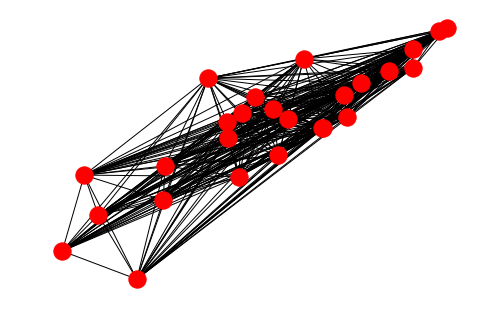

In [14]:
import networkx as nx
G = G=nx.from_numpy_matrix(str2)
nx.draw(G)


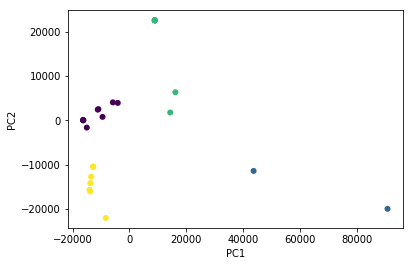

In [15]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

PCA
pca = PCA(n_components=2).fit(str2)
data2D = pca.transform(str2)

# Kmeans
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=3, random_state=0)
km.fit(data2D)

# Show
plt.scatter(data2D[:, 0], data2D[:, 1],
            c=km.labels_, edgecolor='')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

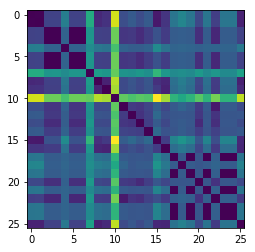

In [16]:
# User input
n_samples  = 26
n_features =  1

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i,mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(str2, interpolation='none')
plt.show()